# 05. forecast(시계열 분석)

## 1. 배경 및 설치

- fbprophet
    - https://facebook.github.io/prophet/
- install
    - 윈도우 유저는 Visual C++ Build Tool을 먼저 설치해주세요
    - https://go.microsoft.com/fwlink/?LinkId=691126
    - conda install pandas-datareader 
    - conda install -c conda-forge fbprophet
    - pip install fbprophet

In [9]:
def test_def(a,b) :
    '''
    이것은 두개의 인자를 더해주는 테스트 함수입니다.
    '''
    return a+b

print(test_def(2,3))

help(test_def)

5
Help on function test_def in module __main__:

test_def(a, b)
    이것은 두개의 인자를 더해주는 테스트 함수입니다.



---

## 함수(def)의 기초

In [10]:
def test_def(a, b):
    return a + b

In [11]:
c = test_def(2, 3)
c

5

- 가장 기초적인 모양의 def 정의 
- 이름(test_df)과 입력 인자(a, b)를 정해준다 
- 출력(return)을 작성

In [12]:
# 전역변수(global)
a = 1 

def edit_a(i):
    # 지역변수(local)
    global a 
    a = i 

In [13]:
edit_a(2)

In [14]:
a

2

- global 변수를 def 내에서 사용하고 싶다면 global로 선언

In [15]:
def edit_a(i):
    a = i 

In [16]:
edit_a(5)
print(a)

2


- def 내에서의 변수와 밖에서의 변수는 같은 이름이어도 같은 것이 아니다

$$ y = asin(2\pi ft + t_0) + b $$

In [17]:
import matplotlib.pyplot as plt 
import numpy as np 
%matplotlib inline 

In [18]:
def plotSinWave(amp, freq, endTime, sampleTime, startTime, bias):
    """
    plot sine wave 
    y = a sin(2 pi f t + t_0) + b
    """
    time = np.arange(startTime, endTime, sampleTime)
    result = amp * np.sin(2 * np.pi * freq * time + startTime) + bias 
    
    plt.figure(figsize=(12, 6))
    plt.plot(time, result)
    plt.grid(True)
    plt.xlabel("time")
    plt.ylabel("sin")
    plt.title(str(amp) + "*sin(2*pi" + str(freq) + "*t+" + str(startTime) + ")+" + str(bias))
    plt.show()

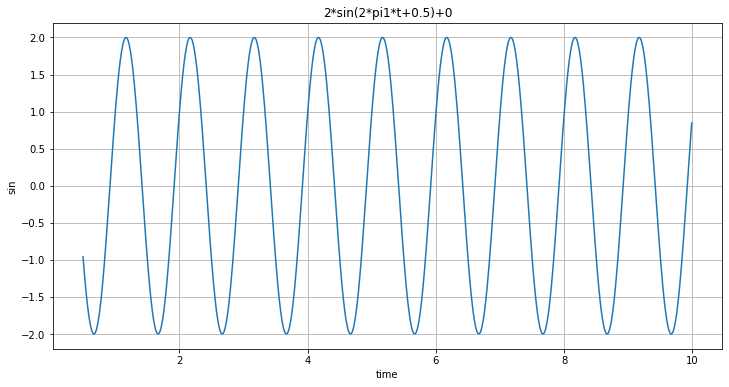

In [19]:
plotSinWave(2, 1, 10, 0.01, 0.5, 0)

In [20]:
def plotSinWave(**kwargs):
    """
    plot sine wave 
    y = a sin(2 pi f t + t_0) + b
    """
    endTime = kwargs.get("endTime", 1)
    sampleTime = kwargs.get("sampleTime", 0.01)
    amp = kwargs.get("amp", 1)
    freq = kwargs.get("freq", 1)
    startTime = kwargs.get("startTime", 0)
    bias = kwargs.get("bias", 0)
    figsize = kwargs.get("figsize", (12, 6))
    
    time = np.arange(startTime, endTime, sampleTime)
    result = amp * np.sin(2 * np.pi * freq * time + startTime) + bias 
    
    plt.figure(figsize=(12, 6))
    plt.plot(time, result)
    plt.grid(True)
    plt.xlabel("time")
    plt.ylabel("sin")
    plt.title(str(amp) + "*sin(2*pi" + str(freq) + "*t+" + str(startTime) + ")+" + str(bias))
    plt.show()

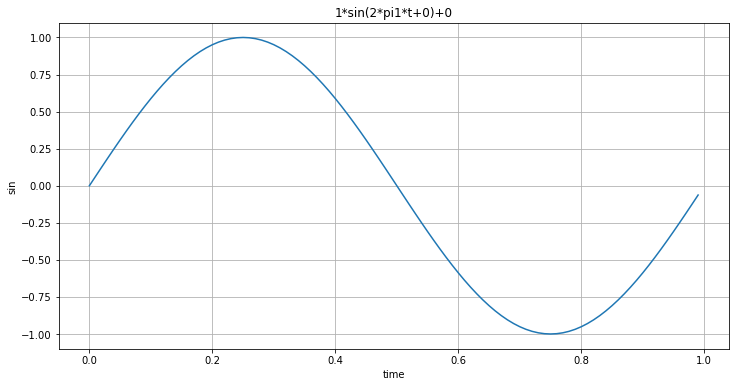

In [21]:
plotSinWave()

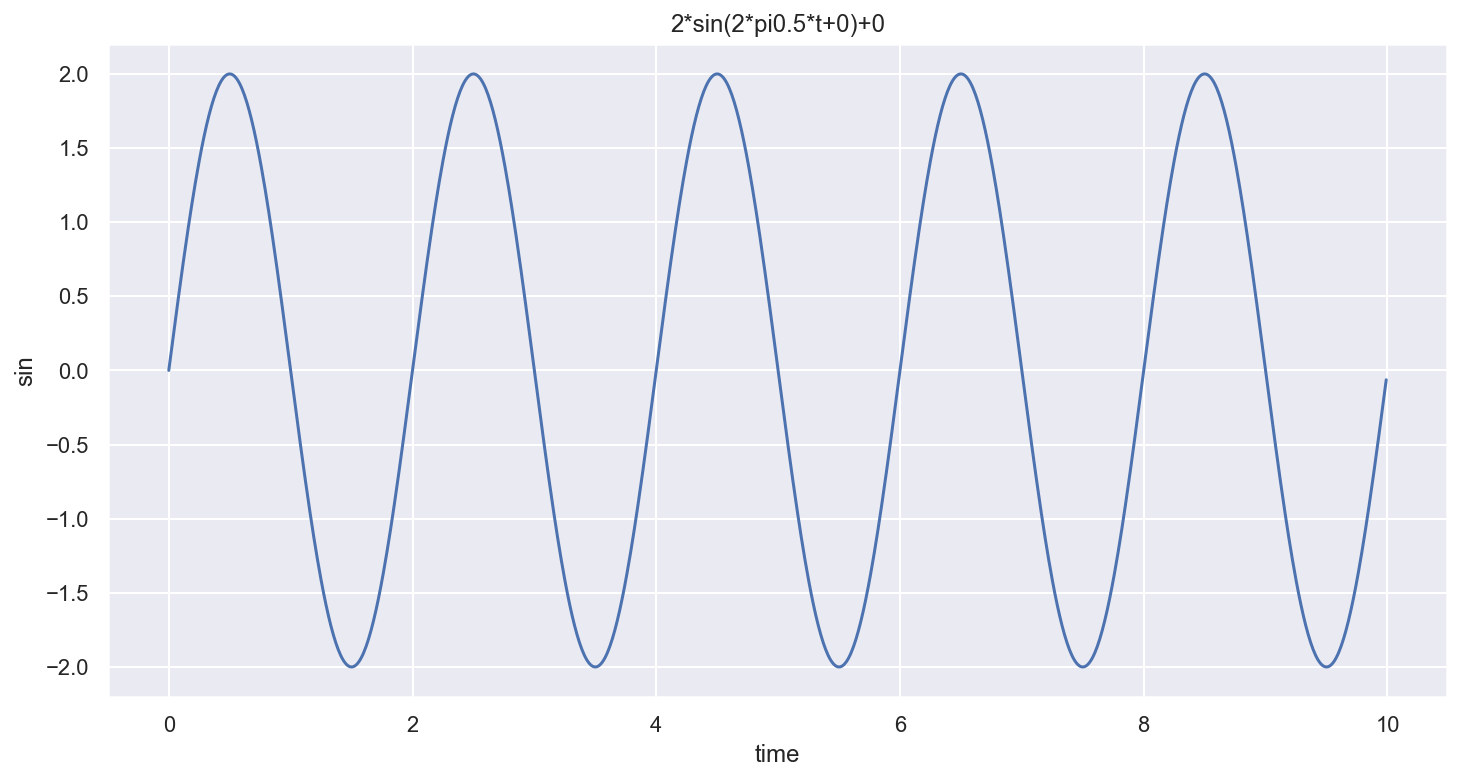

In [13]:
plotSinWave(amp=2, freq=0.5, endTime=10)

## 내가 만든 함수 import
- drawSinWave.py

In [14]:
%%writefile ./drawSinWave.py

import numpy as np 
import matplotlib.pyplot as plt 

def plotSinWave(**kwargs):
    """
    plot sine wave 
    y = a sin(2 pi f t + t_0) + b
    """
    endTime = kwargs.get("endTime", 1)
    sampleTime = kwargs.get("sampleTime", 0.01)
    amp = kwargs.get("amp", 1)
    freq = kwargs.get("freq", 1)
    startTime = kwargs.get("startTime", 0)
    bias = kwargs.get("bias", 0)
    figsize = kwargs.get("figsize", (12, 6))
    
    time = np.arange(startTime, endTime, sampleTime)
    result = amp * np.sin(2 * np.pi * freq * time + startTime) + bias 
    
    plt.figure(figsize=(12, 6))
    plt.plot(time, result)
    plt.grid(True)
    plt.xlabel("time")
    plt.ylabel("sin")
    plt.title(str(amp) + "*sin(2*pi" + str(freq) + "*t+" + str(startTime) + ")+" + str(bias))
    plt.show()
    
if __name__ == "__main__":
    print("hello world~!!")
    print("this is test graph!!")
    plotSinWave(amp=1, endTime=2)

Overwriting ./drawSinWave.py


In [15]:
import drawSinWave as dS

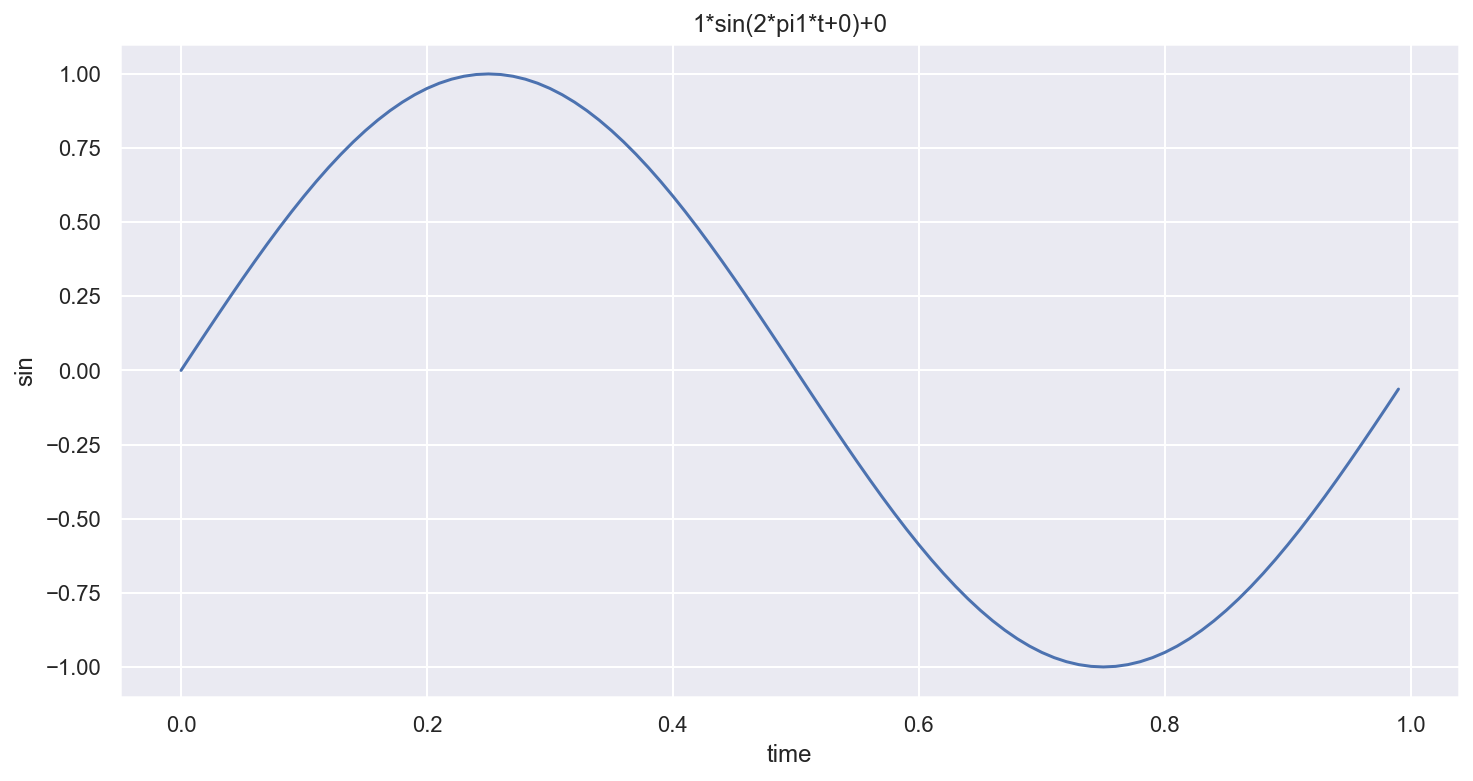

In [16]:
dS.plotSinWave()

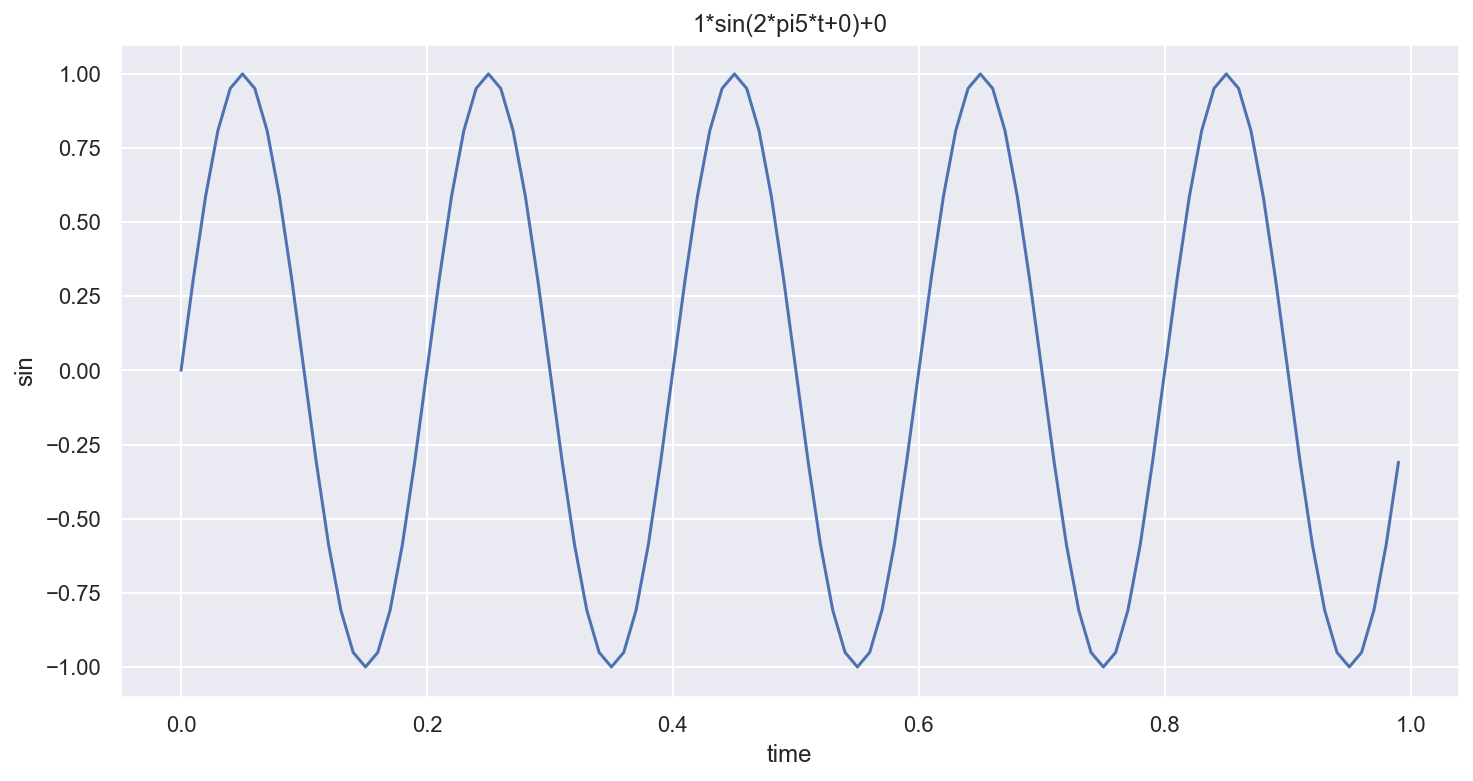

In [17]:
dS.plotSinWave(freq=5)

## 그래프 한글 설정

In [22]:
%%writefile ./set_matplotlib_hangul.py

import platform
import matplotlib.pyplot as plt 
from matplotlib import font_manager, rc

path = "c:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    print("Hangul OK in your MAC!!!")
    rc("font", family="Arial Unicode MS")
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    print("Hangul OK in your Windows!!!")
    rc("font", family=font_name)
else:
    print("Unknown system.. sorry~~~")
    
plt.rcParams["axes.unicode_minus"] = False 

Writing ./set_matplotlib_hangul.py


In [23]:
import set_matplotlib_hangul

Hangul OK in your MAC!!!


Text(0.5, 1.0, '한글')

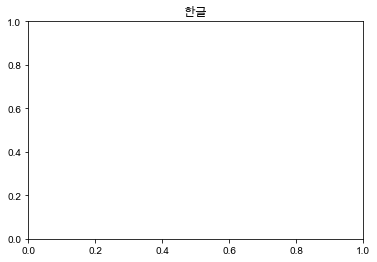

In [24]:
plt.title("한글")

--- 

## 2. Fbprophet 기초

In [21]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

#### 1

In [22]:
time = np.linspace(0, 1, 365*2)
result = np.sin(2*np.pi*12*time)
ds = pd.date_range("2018-01-01", periods=365*2, freq="D")
df = pd.DataFrame({"ds": ds, "y": result})
df.head()

ds         y
0 2018-01-01  0.000000
1 2018-01-02  0.103243
2 2018-01-03  0.205382
3 2018-01-04  0.305326
4 2018-01-05  0.402007

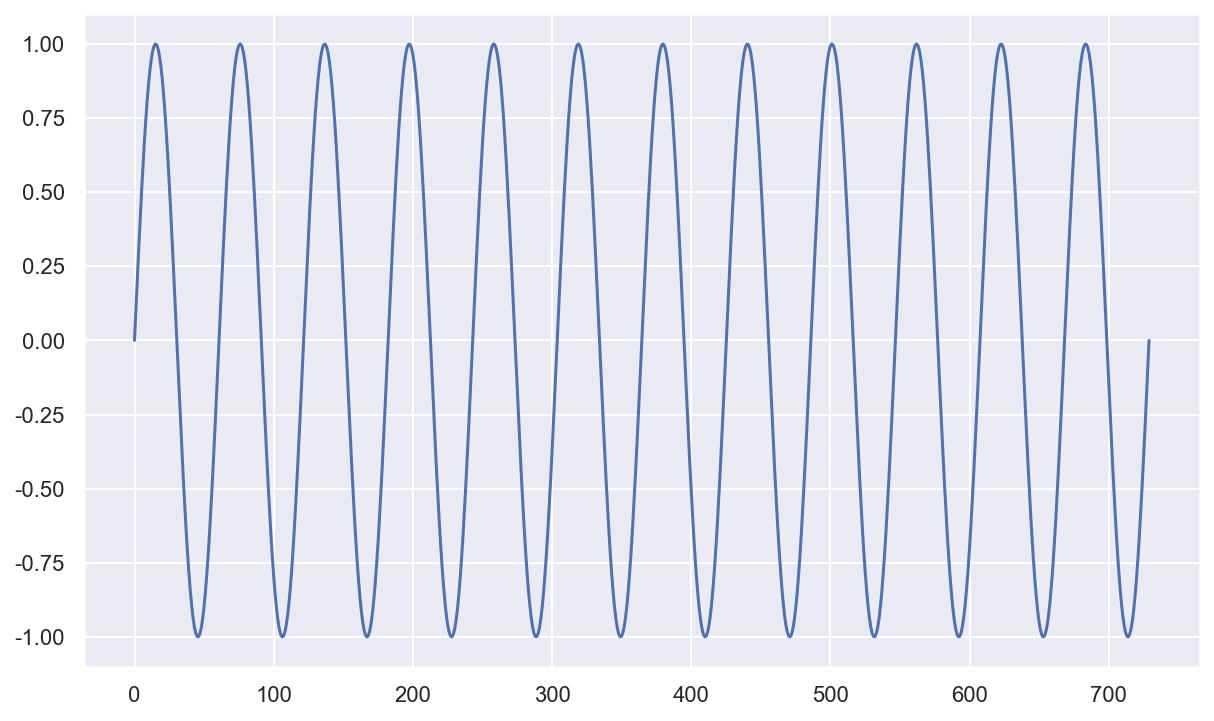

In [23]:
df["y"].plot(figsize=(10, 6));

In [24]:
from fbprophet import Prophet

m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

Importing plotly failed. Interactive plots will not work.


Initial log joint probability = -184.258
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      83       2243.98   0.000116014       202.785   1.654e-06       0.001      171  LS failed, Hessian reset 
      99       2243.99   6.81008e-05       69.3722           1           1      196   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     132       2244.04   0.000117927       192.715   1.086e-06       0.001      287  LS failed, Hessian reset 
     199       2244.07   1.17047e-05       69.8399      0.4955      0.4955      368   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     207       2244.07   6.61177e-06       69.3412   9.836e-08       0.001      415  LS failed, Hessian reset 
     264       2244.09    1.4521e-05       55.1029   2.432e-07       0.001      536  LS failed, Hessian reset 
     299       2244.09   2.05265e-06       70.5043      0.2223   

In [25]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

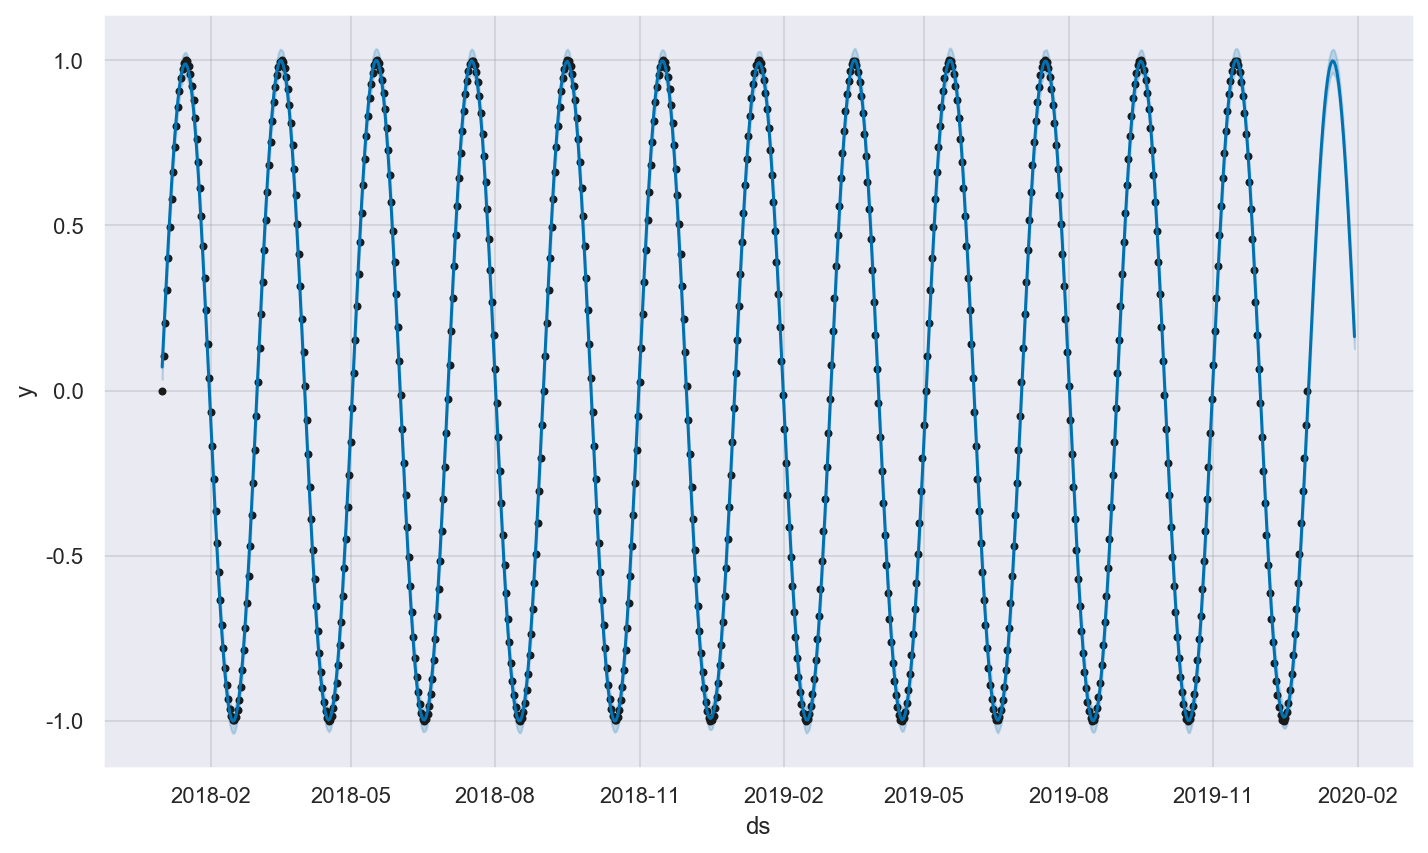

In [26]:
m.plot(forecast);

#### 2 

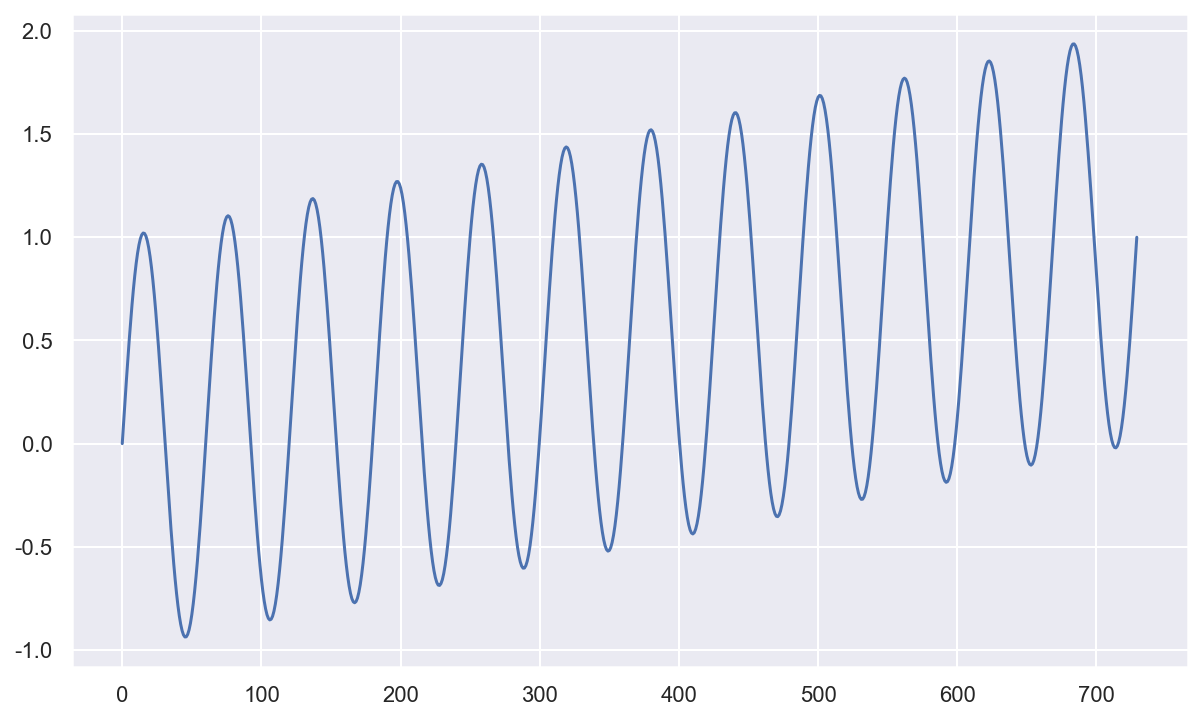

In [27]:
time = np.linspace(0, 1, 365*2)
result = np.sin(2*np.pi*12*time) + time 

ds = pd.date_range("2018-01-01", periods=365*2, freq="D")
df = pd.DataFrame({"ds": ds, "y": result})

df["y"].plot(figsize=(10, 6));

Initial log joint probability = -50.6009
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2727.71   0.000249041       213.603      0.5207      0.5207      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2728.46   0.000218683       151.551           1           1      248   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        2728.9    0.00013174       94.8048       1.095      0.1095      375   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     343       2729.04   9.96195e-06       102.146   5.178e-08       0.001      472  LS failed, Hessian reset 
     399        2729.2    0.00145918       121.351           1           1      547   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     490       2730.19   1.11838e-05    

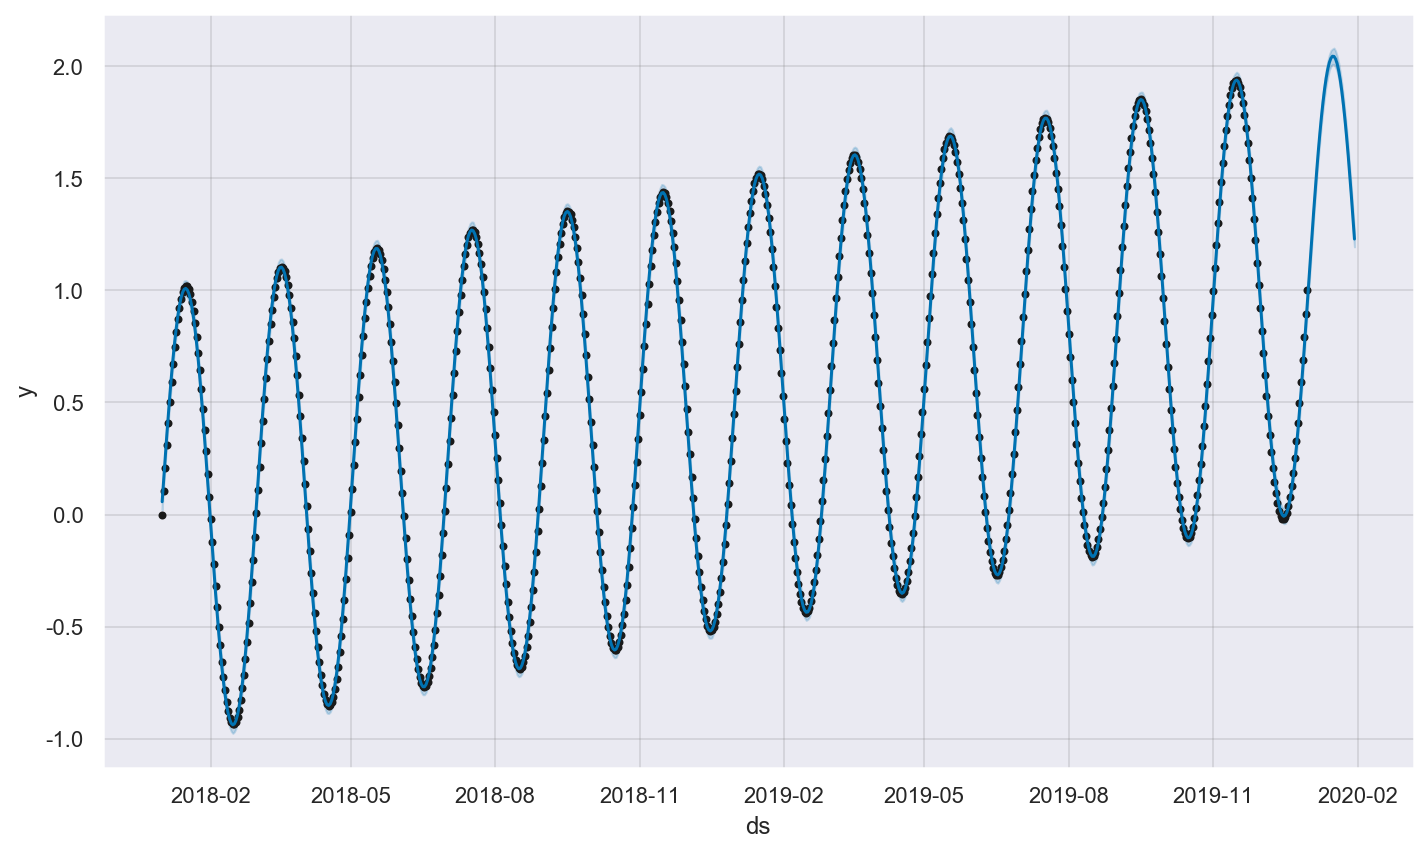

In [28]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
m.plot(forecast);

#### 3

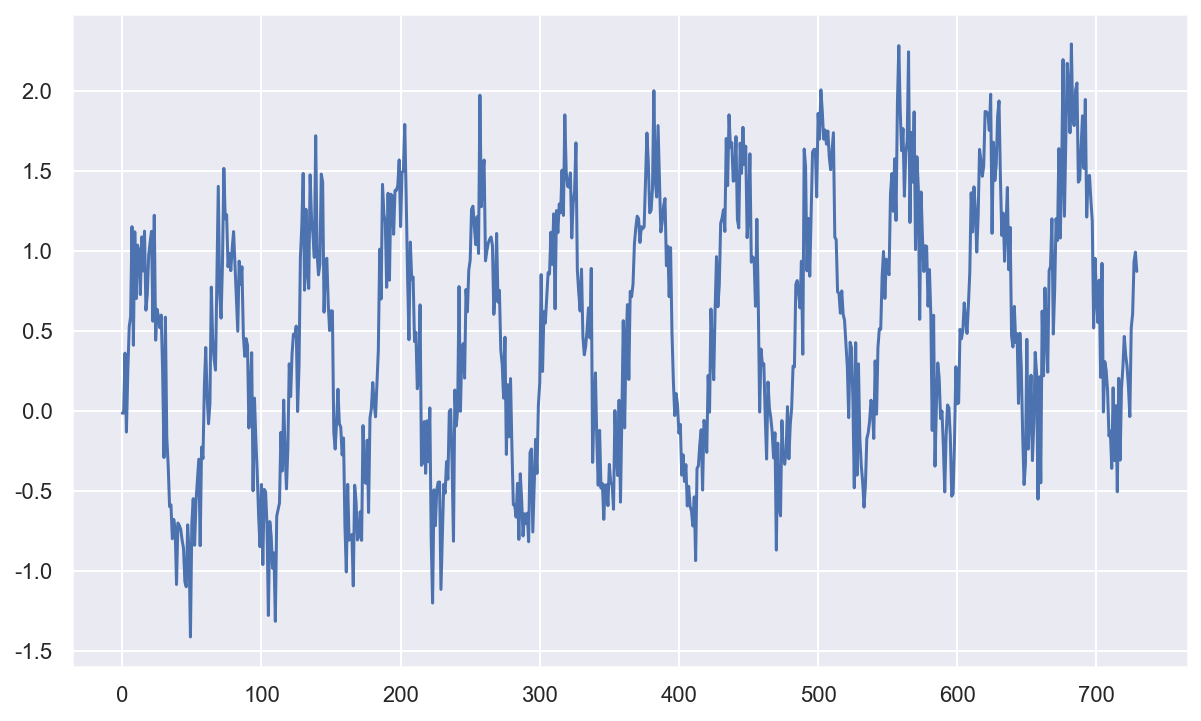

In [29]:
time = np.linspace(0, 1, 365*2)
result = np.sin(2*np.pi*12*time) + time + np.random.randn(365*2)/4

ds = pd.date_range("2018-01-01", periods=365*2, freq="D")
df = pd.DataFrame({"ds": ds, "y": result})

df["y"].plot(figsize=(10, 6));

Initial log joint probability = -41.9235
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1258.78   4.54171e-08       48.9336      0.4005      0.4005      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     100       1258.78   8.49335e-08       72.1948      0.1925           1      132   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


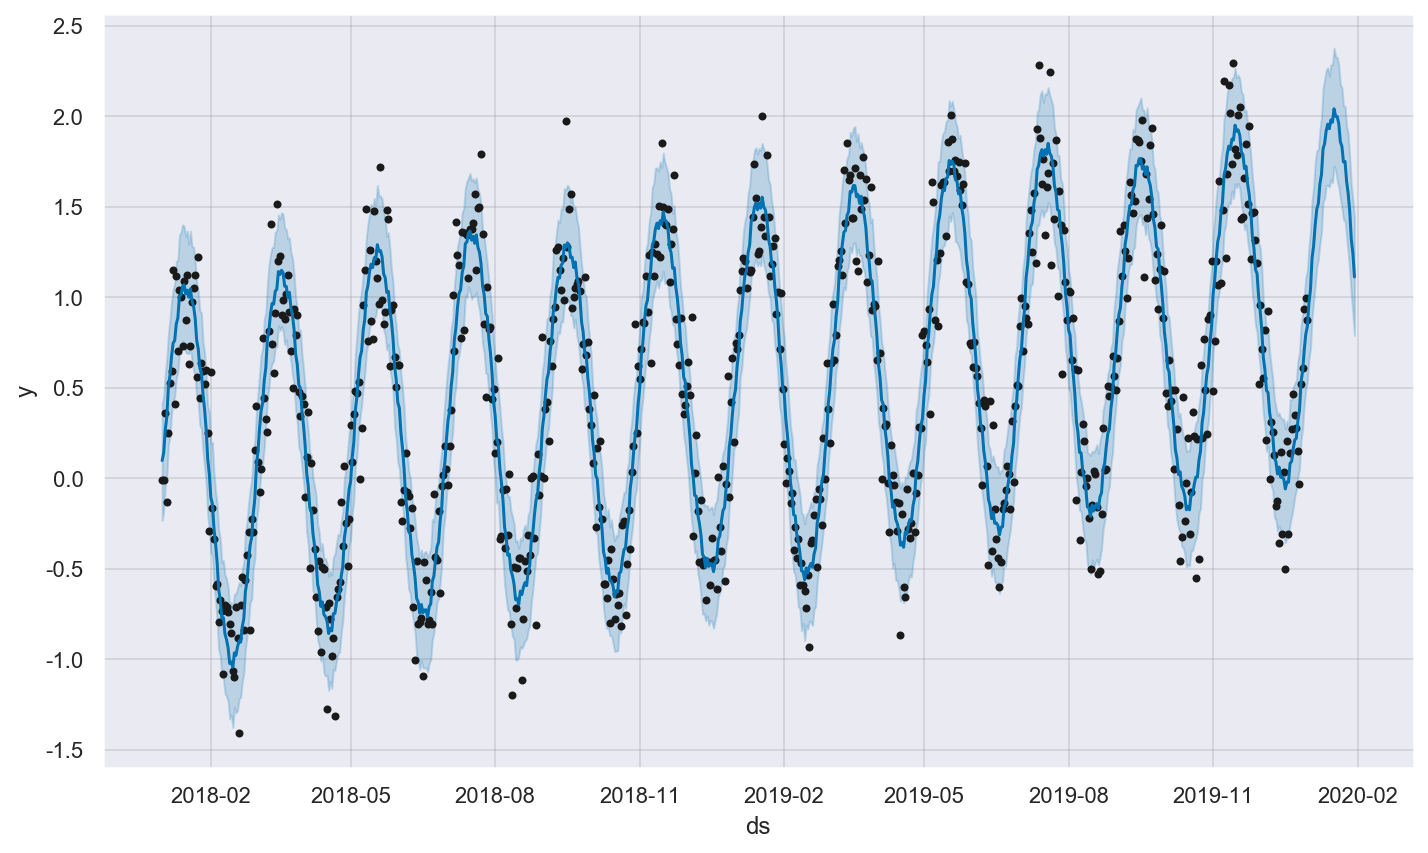

In [30]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
m.plot(forecast);

In [31]:
import pandas as pd 
import pandas_datareader as web 
import numpy as np 
import matplotlib.pyplot as plt 

from fbprophet import Prophet
from datetime import datetime 

%matplotlib inline 

In [34]:
pinkwink_web = pd.read_csv(
    "../data/05_PinkWink_Web_Traffic.csv",
    encoding="utf-8",
    thousands=",",
    names=["date", "hit"],
    index_col=0
)

pinkwink_web = pinkwink_web[pinkwink_web["hit"].notnull()]
pinkwink_web.head()

hit
date            
16. 7. 1.  766.0
16. 7. 2.  377.0
16. 7. 3.  427.0
16. 7. 4.  902.0
16. 7. 5.  850.0

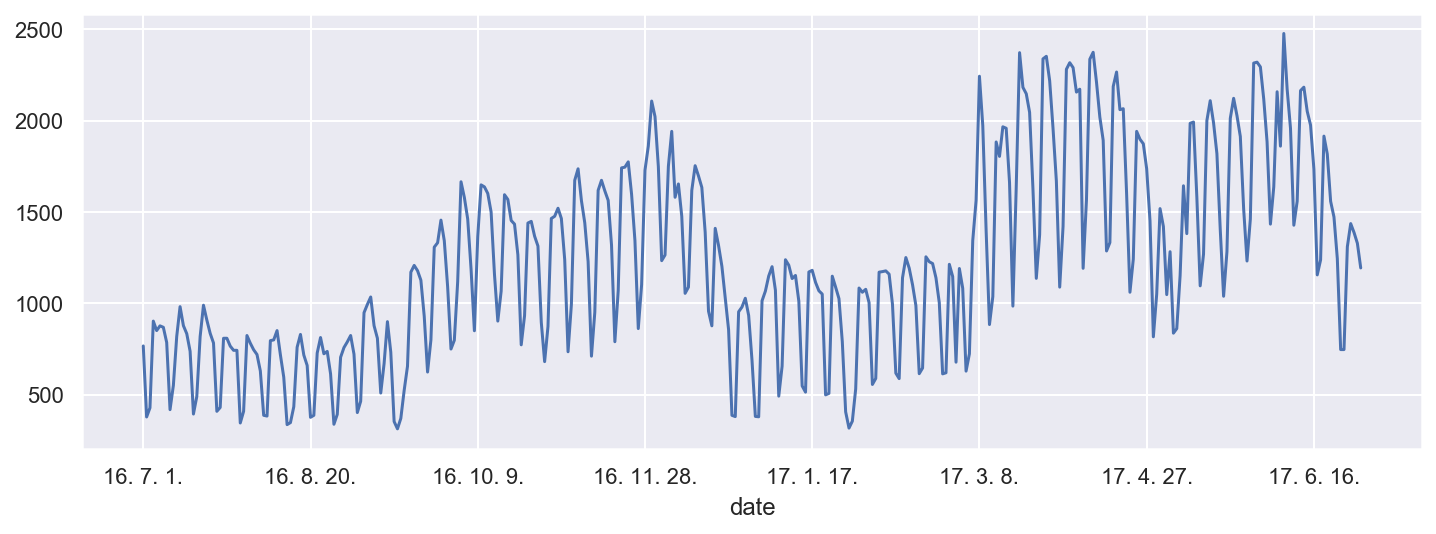

In [36]:
# 전체 데이터 그려보기 
pinkwink_web["hit"].plot(figsize=(12, 4), grid=True);

In [40]:
# trend 분석을 시각화하기 위한 x축 값을 만들기 
time = np.arange(0, len(pinkwink_web))
traffic = pinkwink_web["hit"].values
fx = np.linspace(0, time[-1], 1000)

In [43]:
# 에러를 계산할 함수 
def error(f, x, y):
    return np.sqrt(np.mean((f(x) - y) ** 2))

In [45]:
fp1 = np.polyfit(time, traffic, 1)
f1 = np.poly1d(fp1)

f2p = np.polyfit(time, traffic, 2)
f2 = np.poly1d(f2p)

f3p = np.polyfit(time, traffic, 3)
f3 = np.poly1d(f3p)

f15p = np.polyfit(time, traffic, 15)
f15 = np.poly1d(f15p)

In [47]:
print(error(f1, time, traffic))
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic))

430.8597308110963
430.6284101894695
429.53280466762925
330.4777304578471


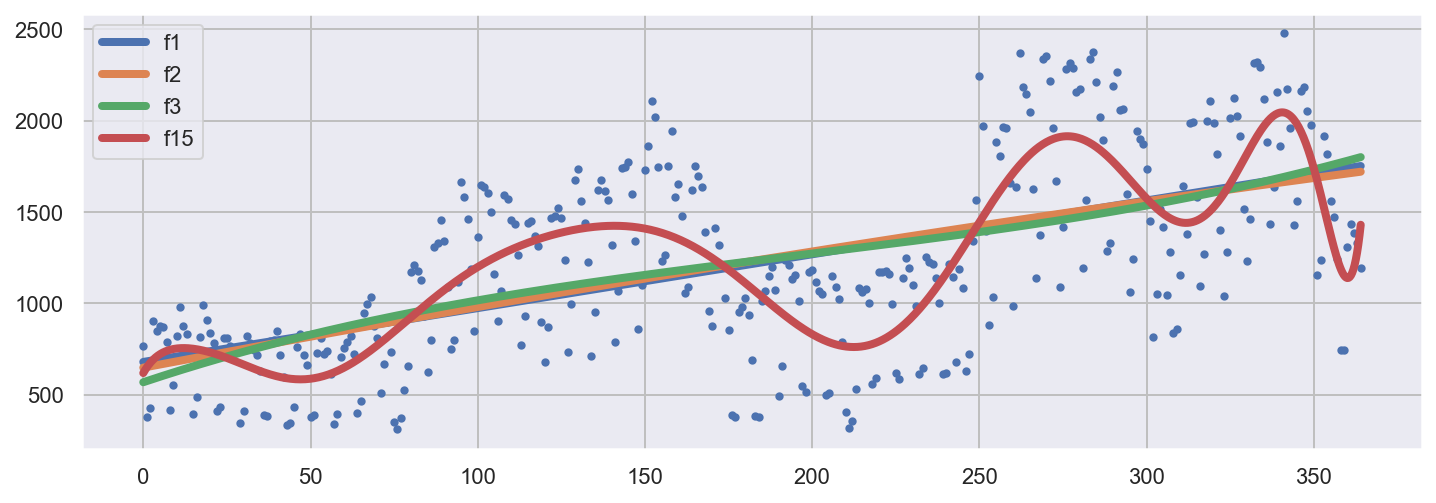

In [71]:
plt.figure(figsize=(12, 4))
plt.scatter(time, traffic, s=10)
plt.plot(fx, f1(fx), lw=4, label='f1')
plt.plot(fx, f2(fx), lw=4, label='f2')
plt.plot(fx, f3(fx), lw=4, label='f3')
plt.plot(fx, f15(fx), lw=4, label='f15')

plt.grid(True, linestyle="-", color="0.75")
plt.legend(loc=2)
plt.show()

In [74]:
df = pd.DataFrame({"ds": pinkwink_web.index, "y": pinkwink_web["hit"]})
df.reset_index(inplace=True)
df["ds"] = pd.to_datetime(df["ds"], format="%y. %m. %d.")
del df["date"]
df.head()

ds      y
0 2016-07-01  766.0
1 2016-07-02  377.0
2 2016-07-03  427.0
3 2016-07-04  902.0
4 2016-07-05  850.0

In [76]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

Initial log joint probability = -10.2116
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       807.563   2.89985e-05       103.473      0.6138      0.6138      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     161       807.842   2.52276e-08       99.3064      0.4625           1      202   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [77]:
# 60일에 해당하는 데이터 예측 
future = m.make_future_dataframe(periods=60)
future.tail()

ds
420 2017-08-25
421 2017-08-26
422 2017-08-27
423 2017-08-28
424 2017-08-29

In [79]:
# 예측 결과는 상한/하한의 범위를 포함해서 얻어진다 
forecast = m.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

ds         yhat  yhat_lower   yhat_upper
420 2017-08-25   908.426640  705.753164  1118.182310
421 2017-08-26   493.450131  289.236993   693.857527
422 2017-08-27   626.043678  423.732562   827.303917
423 2017-08-28  1178.674422  962.592135  1390.020908
424 2017-08-29  1214.633910  995.335330  1428.769842

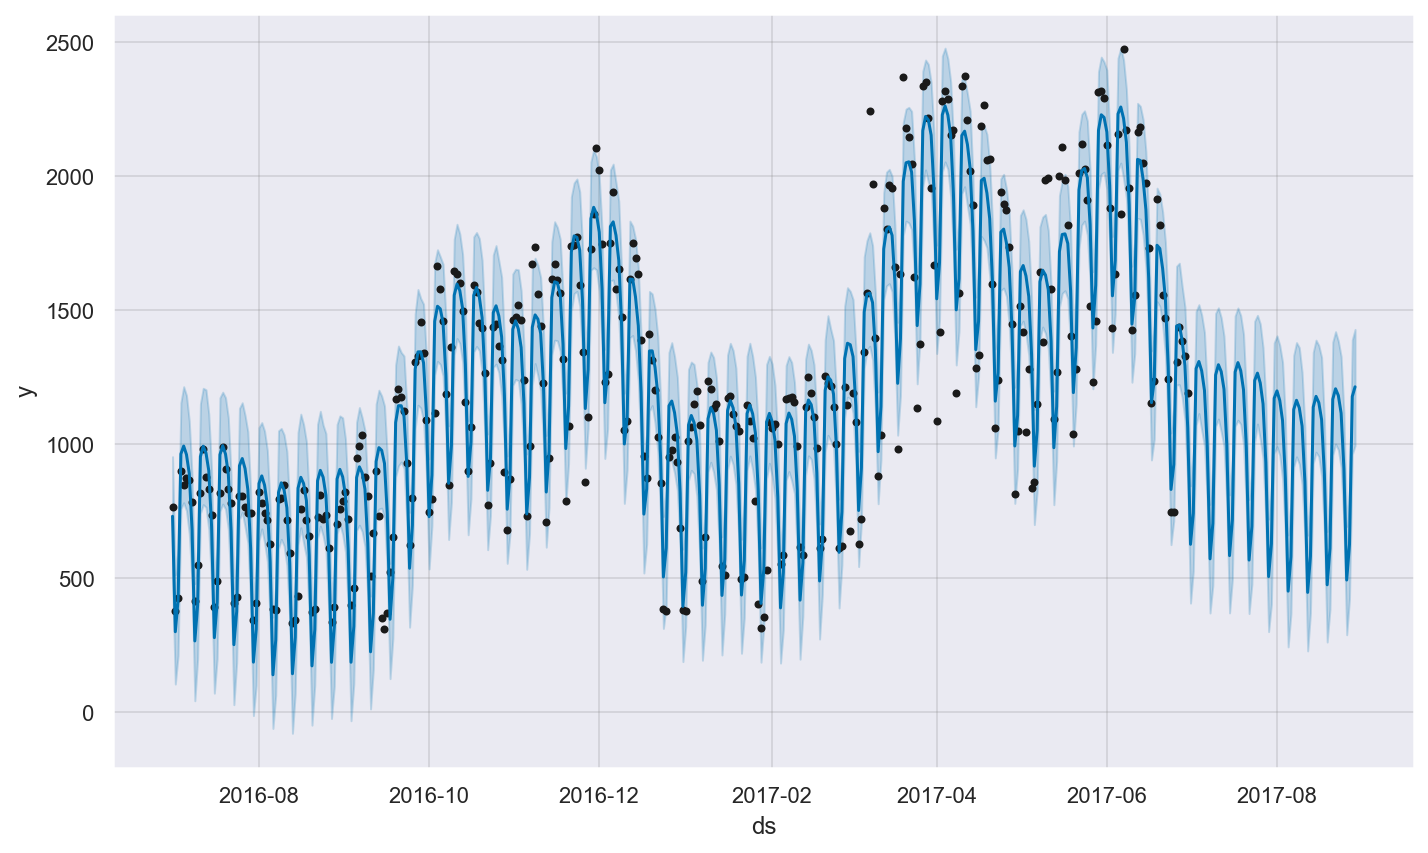

In [80]:
m.plot(forecast);

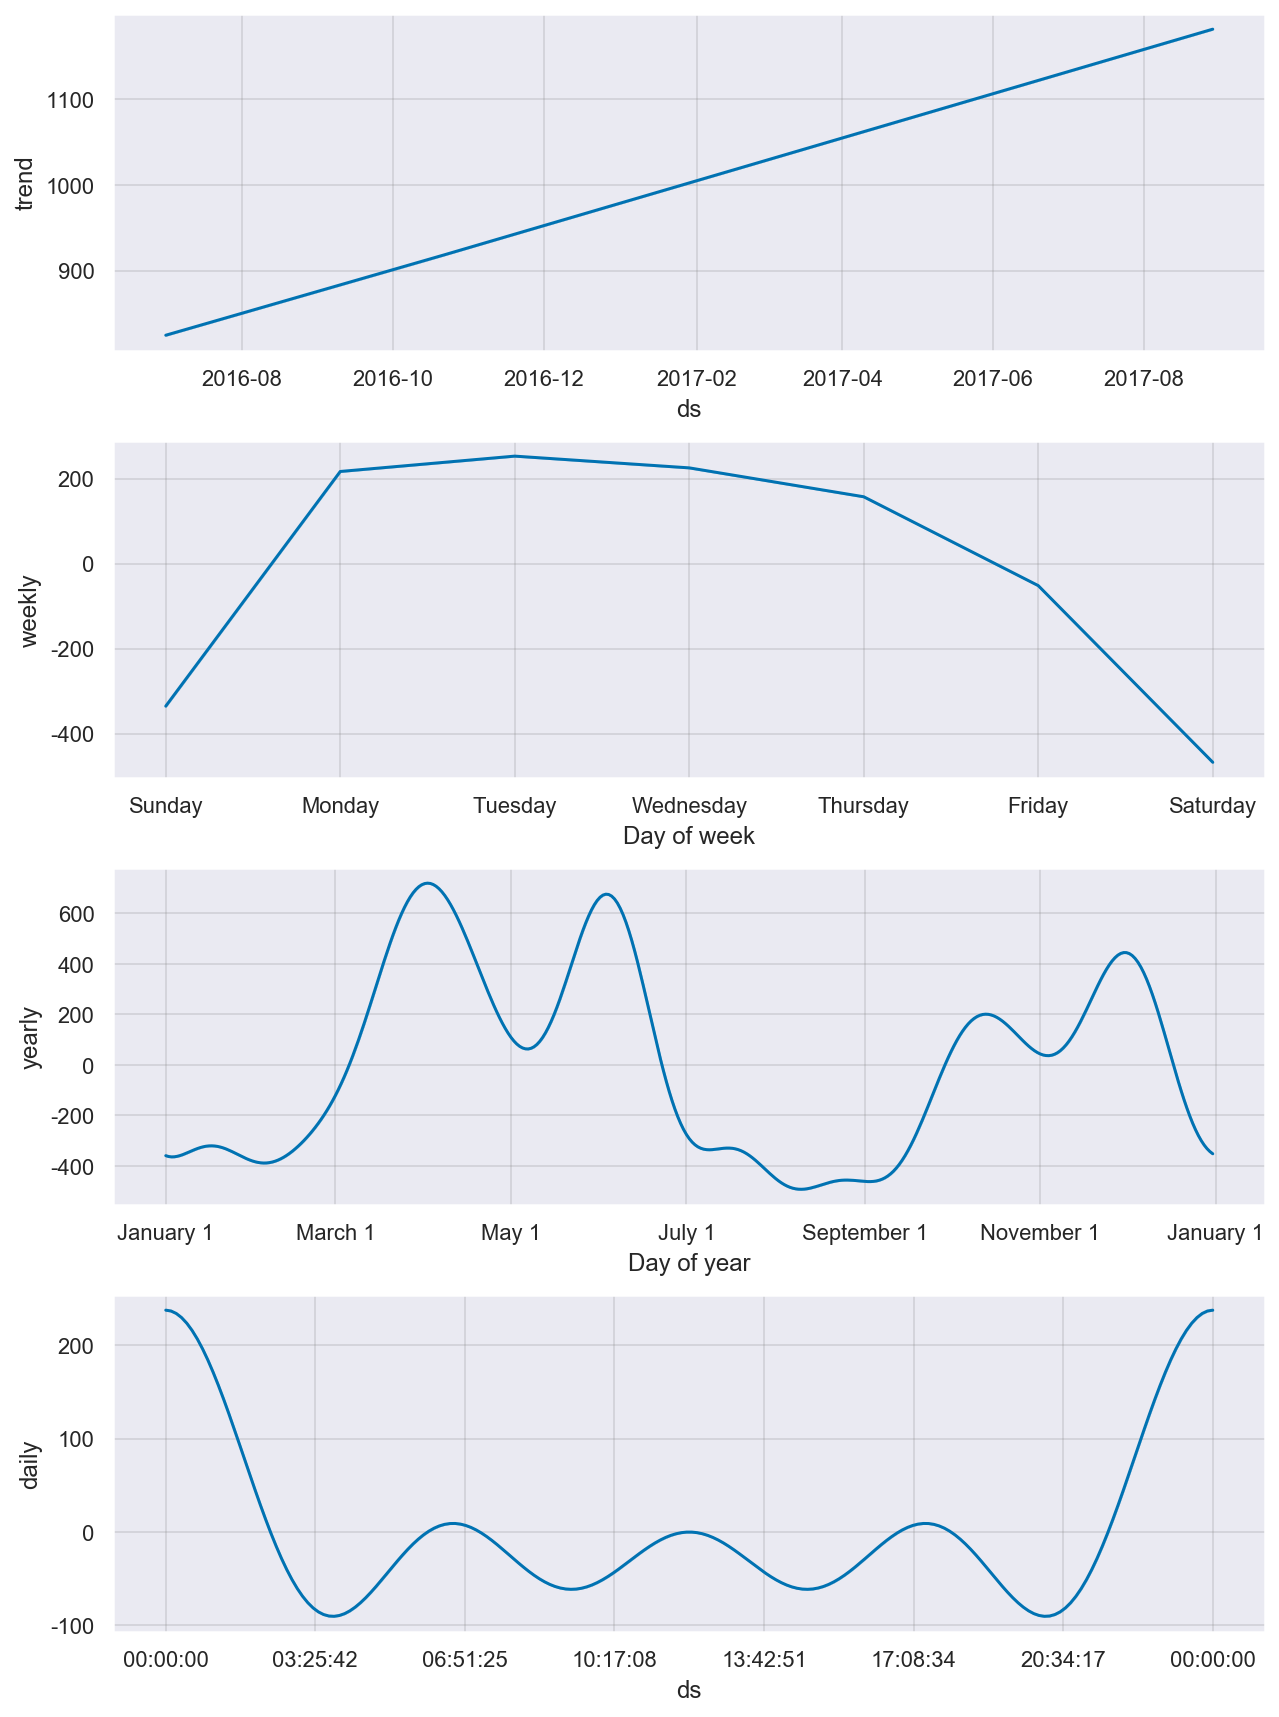

In [81]:
m.plot_components(forecast);

## 4. 주식 데이터 fbprophet 으로 분석하기

#### 1. yahoo finance 
- https://finance.yahoo.com/quote/035420.KS/history?p=035420.KS&guccounter=1

In [89]:
from bs4 import BeautifulSoup
from urllib.request import urlopen, Request

url = "https://finance.yahoo.com/quote/035420.KS/history?p=035420.KS&guccounter=1"
req = Request(url, headers={"User-Agent": "Chrome"})
page = urlopen(req).read()
soup = BeautifulSoup(page, "html.parser")
table = soup.find("table")
df_raw = pd.read_html(str(table))[0]
df_raw.head()

Date       Open       High        Low     Close* Adj Close**  \
0  Sep 29, 2021  380500.00  390000.00  380000.00  387000.00   387000.00   
1  Sep 28, 2021  399500.00  400000.00  391000.00  392500.00   392500.00   
2  Sep 27, 2021  406000.00  407500.00  401000.00  403000.00   403000.00   
3  Sep 24, 2021  398500.00  406000.00  398000.00  405500.00   405500.00   
4  Sep 23, 2021  400500.00  401500.00  397500.00  400000.00   400000.00   

   Volume  
0  662035  
1  857556  
2  455667  
3  574341  
4  615295

In [93]:
# fbprophet을 사용하는 형식에 맞춰준 뒤, 맨 마지막 NaN 값이 있어서 제외 
df_tmp = pd.DataFrame({"ds": df_raw["Date"], "y": df_raw["Close*"]})
df_target = df_tmp[:-1]
df_target.head()

ds          y
0  Sep 29, 2021  387000.00
1  Sep 28, 2021  392500.00
2  Sep 27, 2021  403000.00
3  Sep 24, 2021  405500.00
4  Sep 23, 2021  400000.00

In [94]:
# harcopy 후, 날짜를 fbprophet이 요구하는 형태로 변형
df = df_target.copy()
df["ds"] = pd.to_datetime(df_target["ds"], format="%b %d, %Y")
df.head()

ds          y
0 2021-09-29  387000.00
1 2021-09-28  392500.00
2 2021-09-27  403000.00
3 2021-09-24  405500.00
4 2021-09-23  400000.00

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      100 non-null    datetime64[ns]
 1   y       100 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 1.7+ KB


In [96]:
# 데이터형 변환 object => float 

df["y"] = df["y"].astype("float")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      100 non-null    datetime64[ns]
 1   y       100 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.7 KB


In [97]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

Initial log joint probability = -2.47063
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        345.01     1.665e-05       109.232      0.5528      0.5528      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       345.409   1.07914e-05       102.033      0.3343      0.9088      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     273       345.414   2.45542e-07       97.0235   2.278e-09       0.001      370  LS failed, Hessian reset 
     283       345.414   7.56161e-09       97.6005      0.4717      0.4717      383   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


In [99]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

ds           yhat     yhat_lower     yhat_upper
125 2021-10-25  376441.668692  364861.374301  388095.784671
126 2021-10-26  379940.413023  368973.113163  391663.711937
127 2021-10-27  383157.618028  371774.684871  393866.389453
128 2021-10-28  387954.093720  376807.374331  399053.315398
129 2021-10-29  394222.802287  383617.851822  405936.528478

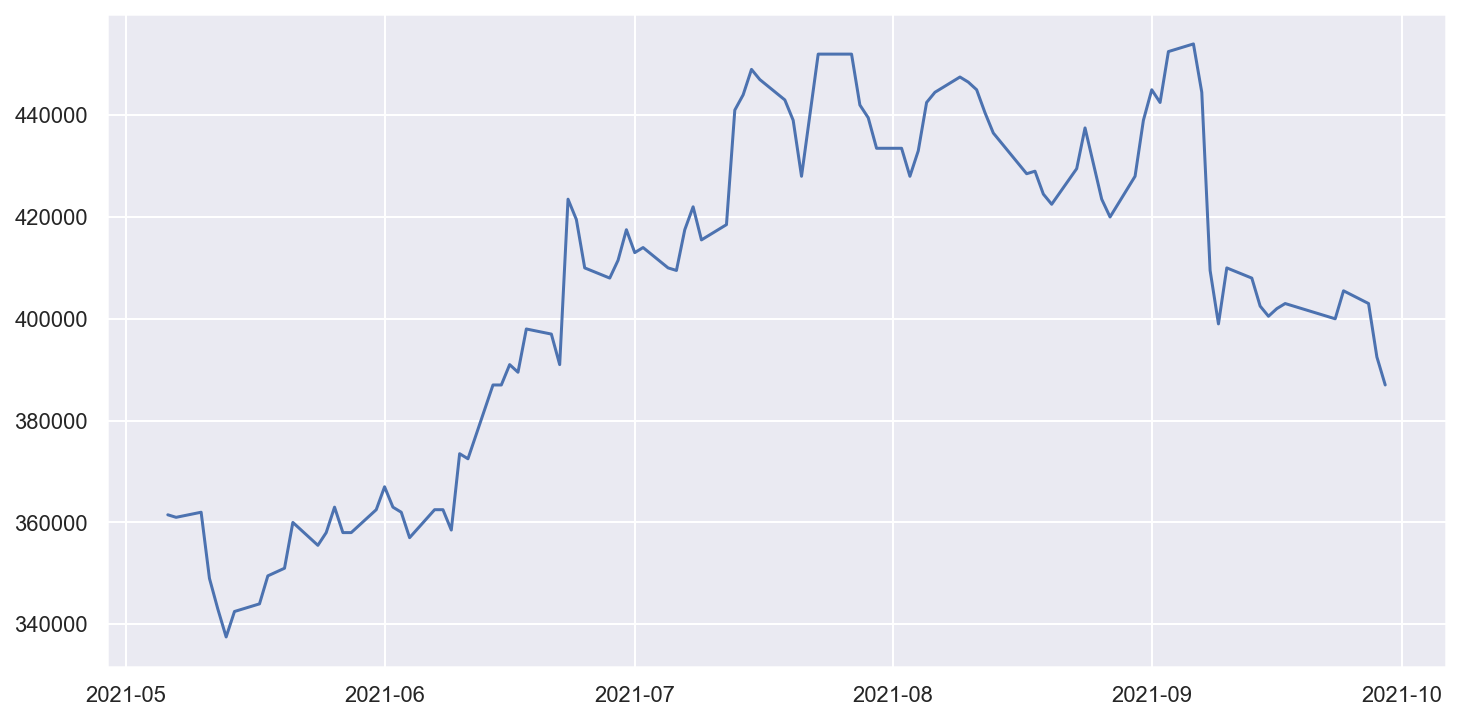

In [101]:
plt.figure(figsize=(12, 6))
plt.plot(df["ds"], df["y"], label="real")
plt.grid(True)
plt.show()

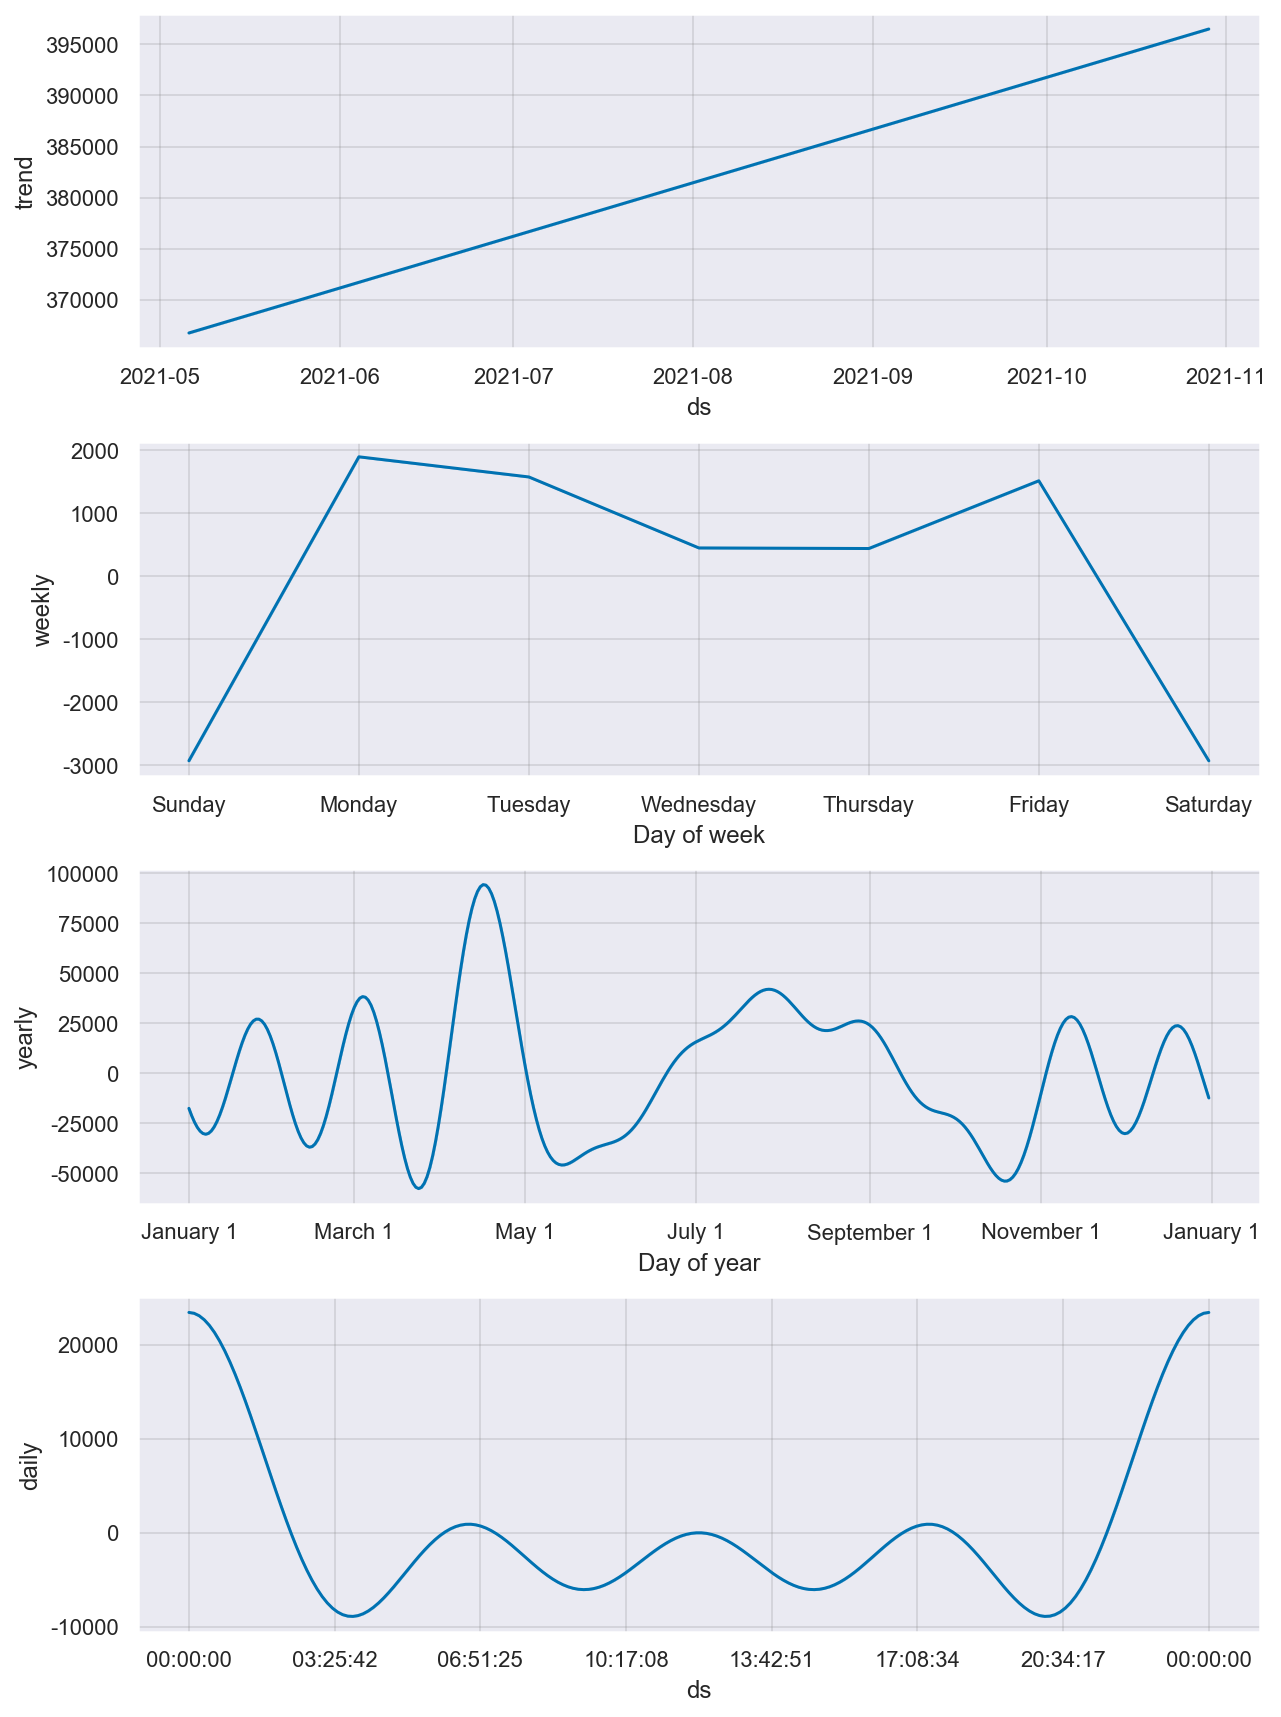

In [102]:
m.plot_components(forecast);

#### 2. KIA 

In [103]:
!pip install yfinance

In [104]:
# 기아 자동차의 종목코드를 가지고 기간을 입력한다
import yfinance as yf
from pandas_datareader import data 

yf.pdr_override()

start_date = "2010-03-01"
end_date = "2018-02-28"
KIA = data.get_data_yahoo("000270.KS", start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [105]:
KIA.head()

Open     High      Low    Close     Adj Close   Volume
Date                                                                 
2010-03-02  22050.0  22300.0  21800.0  21850.0  17800.662109  3935516
2010-03-03  22100.0  22450.0  21850.0  22400.0  18248.732422  4380617
2010-03-04  22400.0  22600.0  22300.0  22500.0  18330.199219  2490087
2010-03-05  22500.0  22750.0  22350.0  22750.0  18533.869141  2379282
2010-03-08  23050.0  23100.0  22500.0  22800.0  18574.603516  4326618

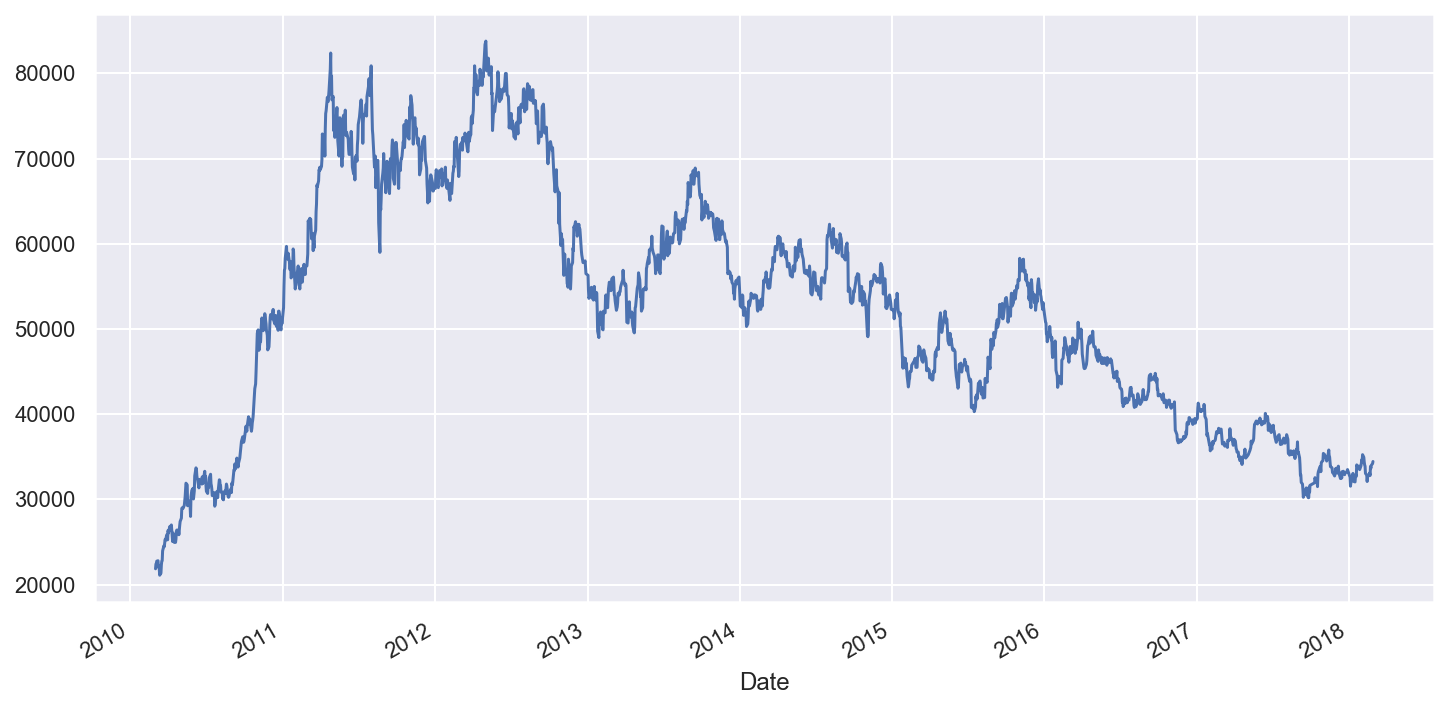

In [106]:
KIA["Close"].plot(figsize=(12, 6), grid=True);

In [107]:
# accuracy(정밀도) 확인을 위한 데이터 
KIA_trunc = KIA[:"2017-11-30"]
KIA_trunc.head()

Open     High      Low    Close     Adj Close   Volume
Date                                                                 
2010-03-02  22050.0  22300.0  21800.0  21850.0  17800.662109  3935516
2010-03-03  22100.0  22450.0  21850.0  22400.0  18248.732422  4380617
2010-03-04  22400.0  22600.0  22300.0  22500.0  18330.199219  2490087
2010-03-05  22500.0  22750.0  22350.0  22750.0  18533.869141  2379282
2010-03-08  23050.0  23100.0  22500.0  22800.0  18574.603516  4326618

In [108]:
# forecast를 위한 준비 
df = pd.DataFrame({"ds": KIA_trunc.index, "y":KIA_trunc["Close"]})
df.reset_index(inplace=True)
del df["Date"]
df.head()

ds        y
0 2010-03-02  21850.0
1 2010-03-03  22400.0
2 2010-03-04  22500.0
3 2010-03-05  22750.0
4 2010-03-08  22800.0

In [109]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

Initial log joint probability = -120.734
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4496.18     0.0287446        1172.4           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        4653.2     0.0393229       1489.44           1           1      247   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4767.33     0.0298233       3467.35           1           1      359   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4803.14    0.00139417       243.827           1           1      471   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4862.68     0.0101864       904.082           1           1      586   
    Iter      log prob        ||dx||      ||grad||       alpha  

In [110]:
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

ds          yhat    yhat_lower    yhat_upper
2001 2018-02-24  26821.163913  22833.836475  30843.089407
2002 2018-02-25  26901.865881  22829.175410  31077.106236
2003 2018-02-26  27150.658200  22809.598389  31286.032343
2004 2018-02-27  27312.331150  23267.887758  31777.373972
2005 2018-02-28  27358.397829  23442.176183  31330.122417

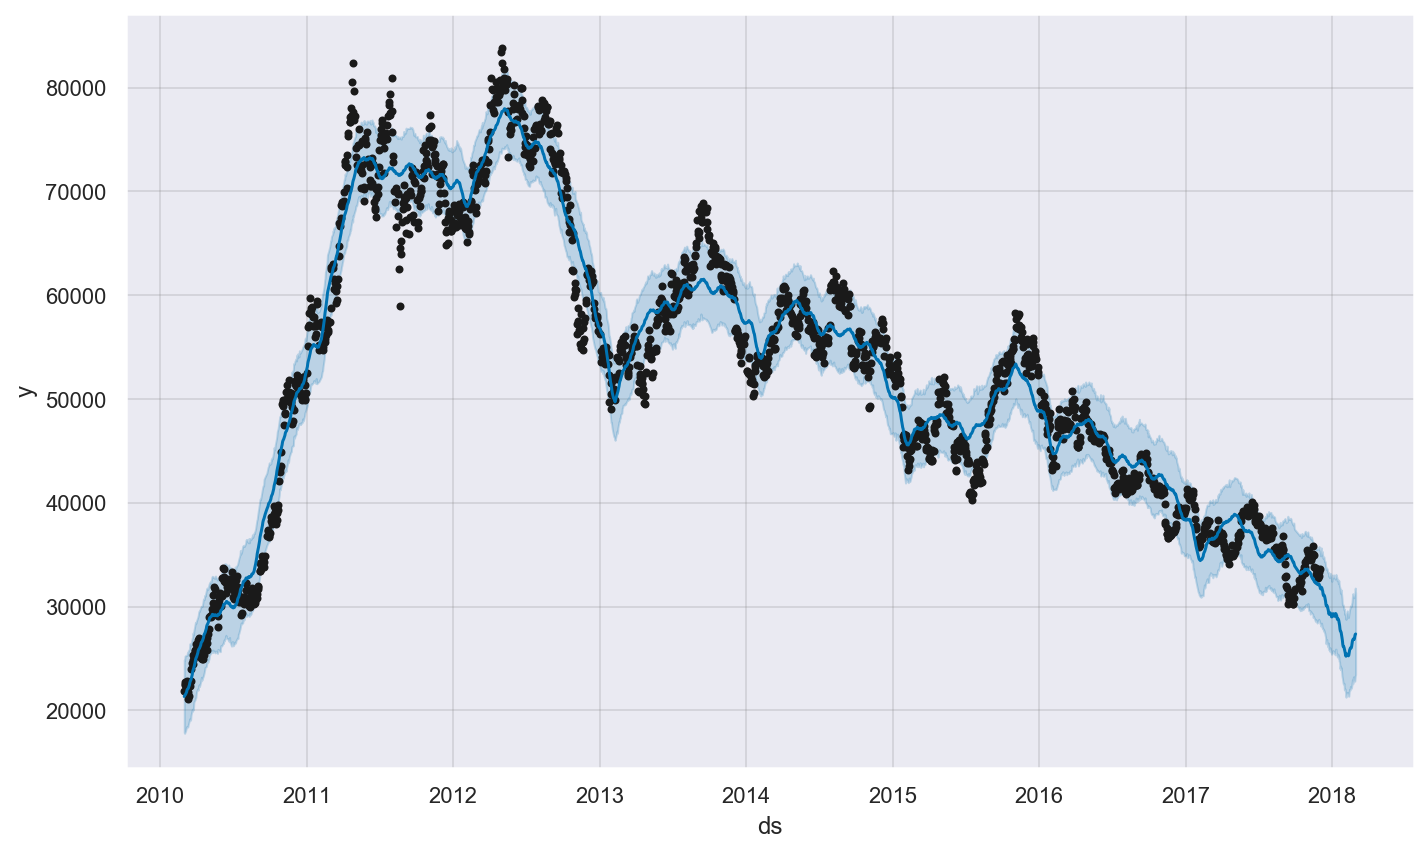

In [111]:
m.plot(forecast);

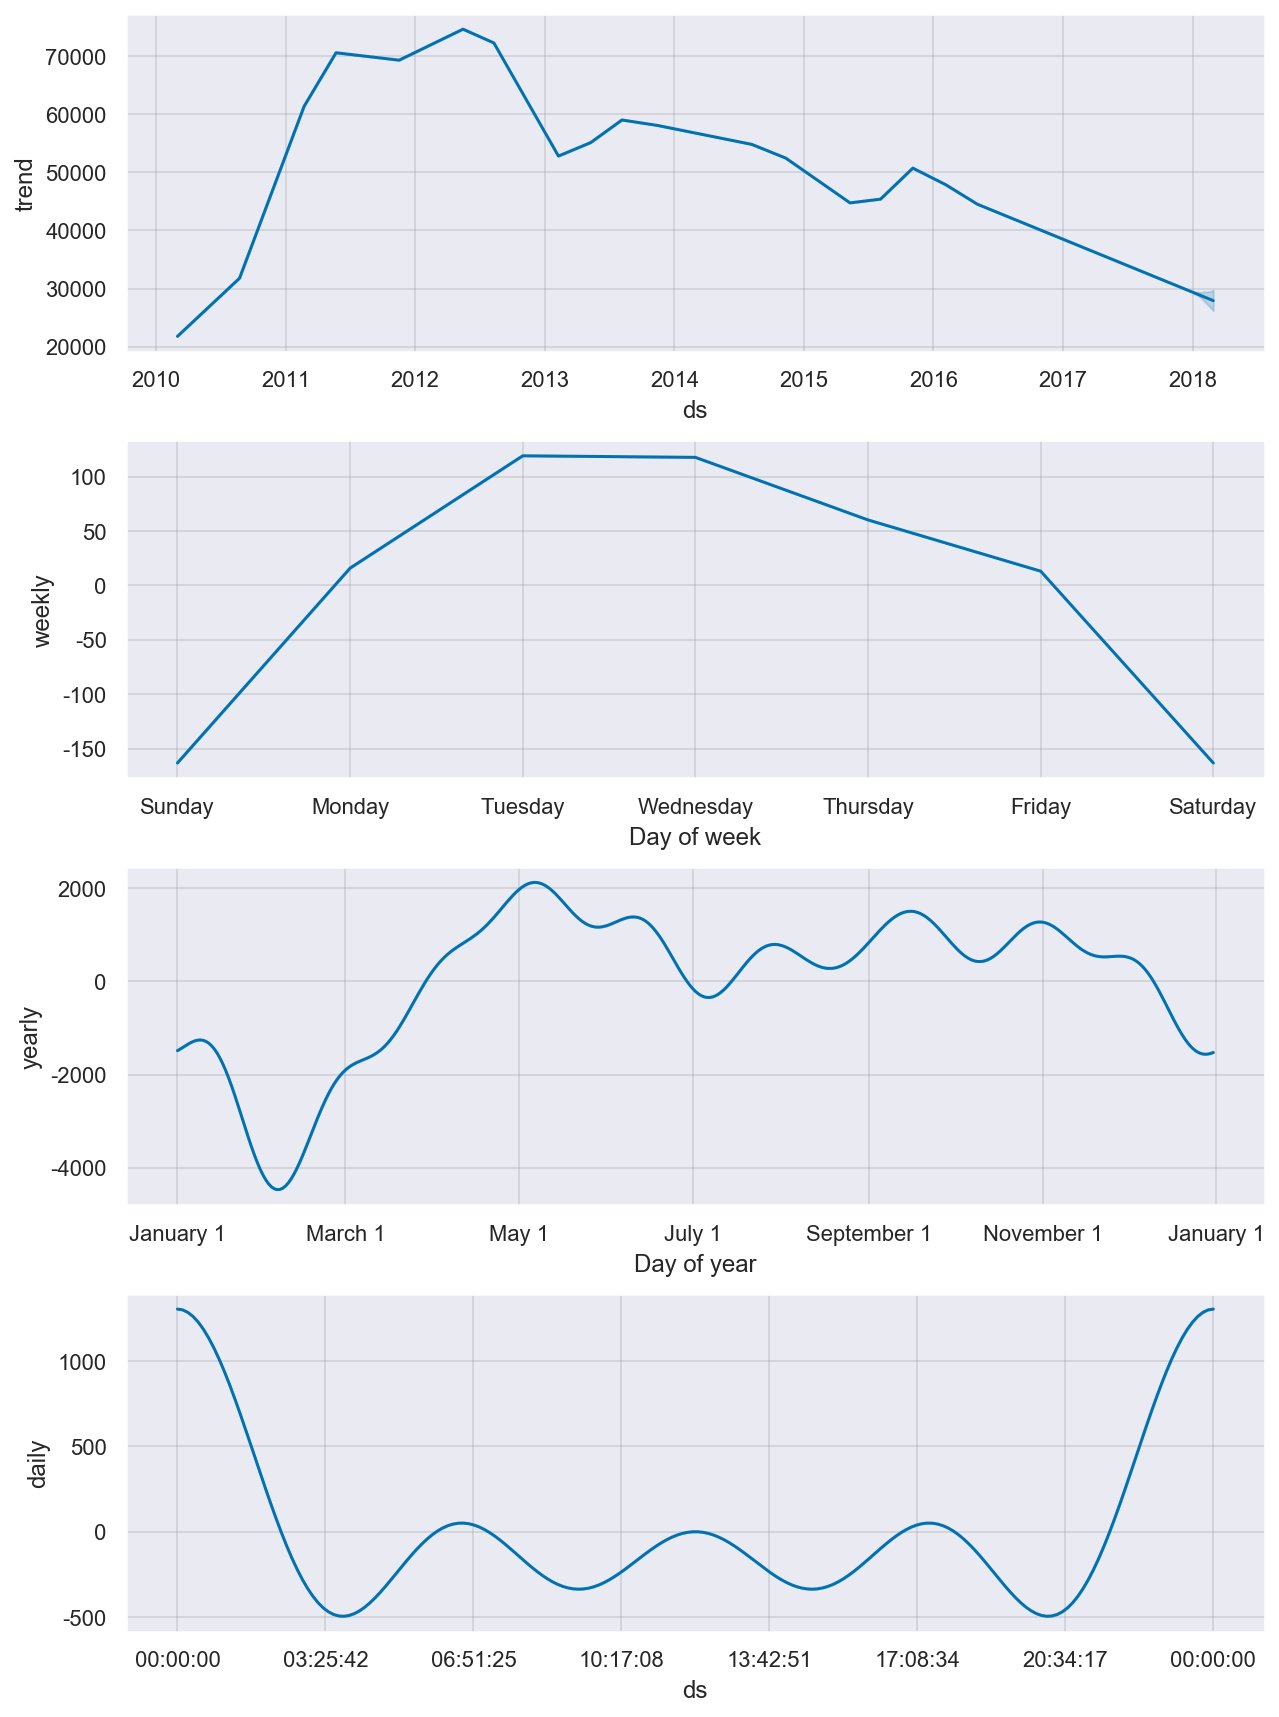

In [112]:
m.plot_components(forecast);

In [113]:
KIA["Close"]

Date
2010-03-02    21850.0
2010-03-03    22400.0
2010-03-04    22500.0
2010-03-05    22750.0
2010-03-08    22800.0
               ...   
2018-02-21    33850.0
2018-02-22    33650.0
2018-02-23    34000.0
2018-02-26    34200.0
2018-02-27    34450.0
Name: Close, Length: 1972, dtype: float64

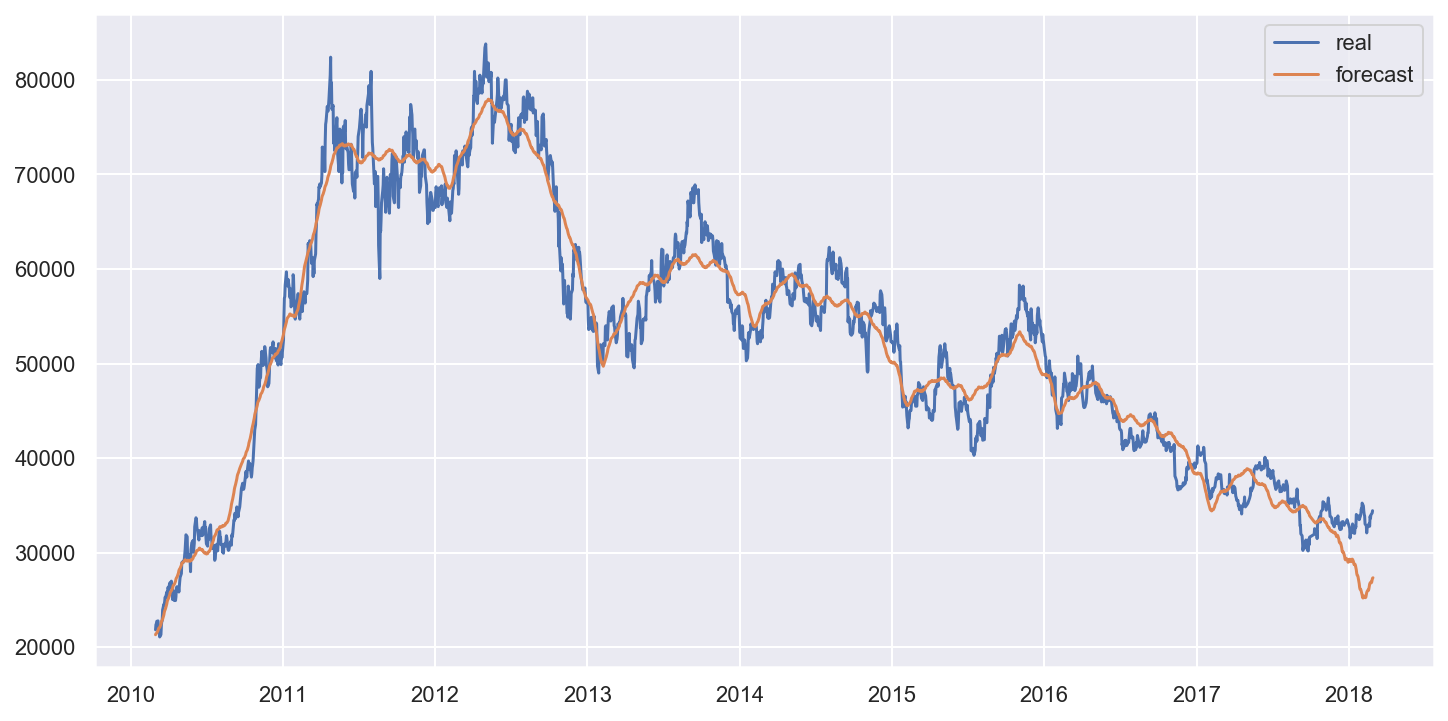

In [114]:
plt.figure(figsize=(12, 6))
plt.plot(KIA.index, KIA["Close"], label="real")
plt.plot(forecast["ds"], forecast["yhat"], label="forecast")
plt.grid(True)
plt.legend()
plt.show()

#### 3. 대한항공

In [116]:
# 003490 대한항공 

start_date = "2010-03-01"
end_date = "2018-02-28"
KoreaAir = data.get_data_yahoo("003490.KS", start_date, end_date)
KoreaAir.tail()

[*********************100%***********************]  1 of 1 completed


Open     High      Low    Close     Adj Close  Volume
Date                                                                
2018-02-21  35350.0  35950.0  35150.0  35350.0  35167.996094  237279
2018-02-22  35050.0  35450.0  34800.0  35000.0  34819.800781  260174
2018-02-23  35200.0  35400.0  34550.0  35150.0  34969.027344  321125
2018-02-26  35300.0  35550.0  33600.0  33900.0  33725.460938  932870
2018-02-27  33900.0  34300.0  33650.0  33900.0  33725.460938  527398

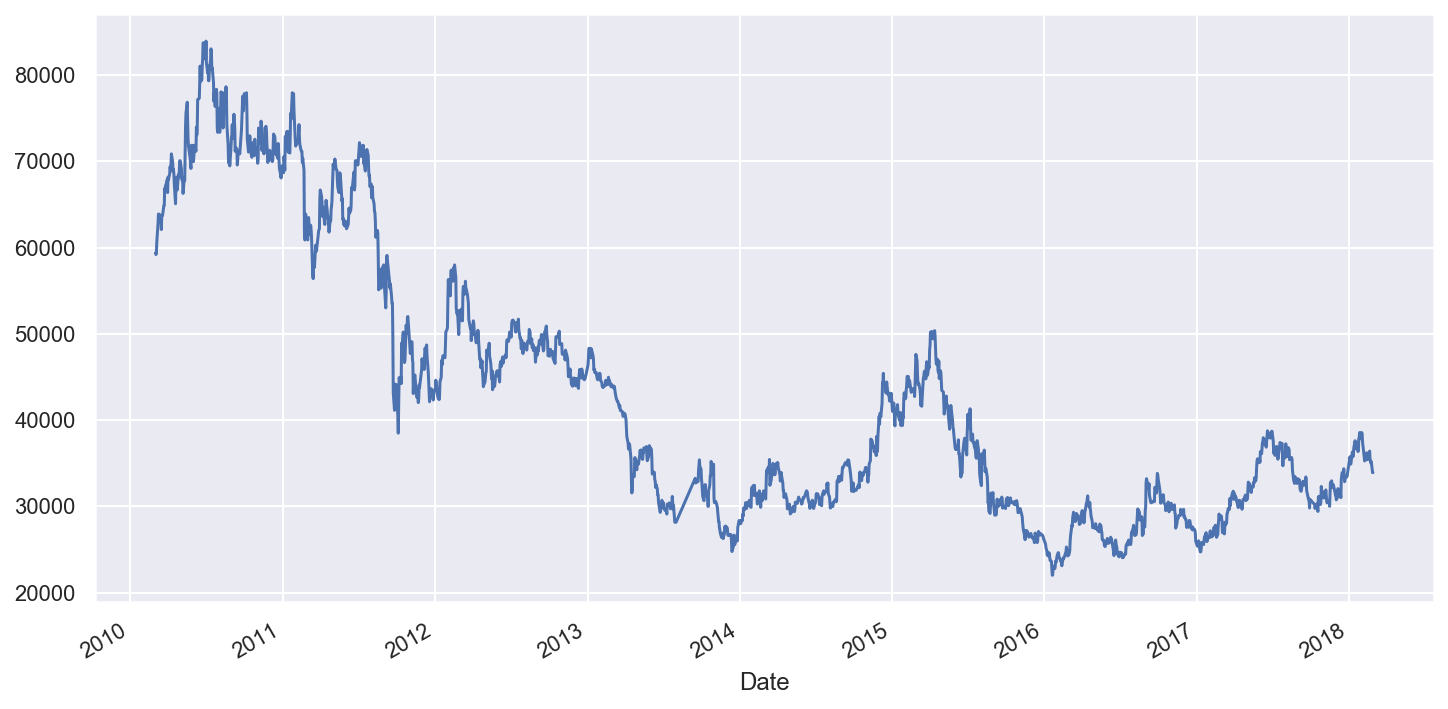

In [117]:
KoreaAir["Close"].plot(figsize=(12, 6), grid=True);

In [119]:
# accuracy 데이터 분리 
KoreaAir_trunc = KoreaAir[:"2017-11-30"]
KoreaAir_trunc.tail()

Open     High      Low    Close     Adj Close  Volume
Date                                                                
2017-11-24  32900.0  33250.0  32300.0  32500.0  32168.935547  530941
2017-11-27  32600.0  32800.0  31800.0  31850.0  31525.556641  472095
2017-11-28  32050.0  32500.0  31550.0  31600.0  31278.103516  708754
2017-11-29  31850.0  32250.0  31050.0  31300.0  30981.160156  850385
2017-11-30  31800.0  32050.0  31350.0  31350.0  31030.650391  682573

In [122]:
# forecast를 위한 준비 
df = pd.DataFrame({"ds": KoreaAir_trunc.index, "y": KoreaAir_trunc["Close"]})
df.reset_index(inplace=True)
del df["Date"]
df.head()

ds             y
0 2010-03-02  59390.417969
1 2010-03-03  59190.785156
2 2010-03-04  59290.601562
3 2010-03-05  60588.207031
4 2010-03-08  62784.152344

In [123]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)

Initial log joint probability = -15.6966


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4580.12     0.0454261       1947.91      0.4923           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4684.21     0.0359983        680.33           1           1      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4719.25    0.00400661       1538.76      0.7441      0.7441      347   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399          4766    0.00594392       387.625           1           1      457   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4794.73    0.00673907        940.77           1           1      576   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599     

In [124]:
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

ds          yhat    yhat_lower    yhat_upper
1970 2018-02-24  34878.599294  30716.865701  39107.240875
1971 2018-02-25  34778.123843  30334.170613  39094.564166
1972 2018-02-26  35727.461630  31150.891445  40116.188384
1973 2018-02-27  35565.733450  31093.800300  39869.790574
1974 2018-02-28  35497.575850  31427.553570  39885.774290

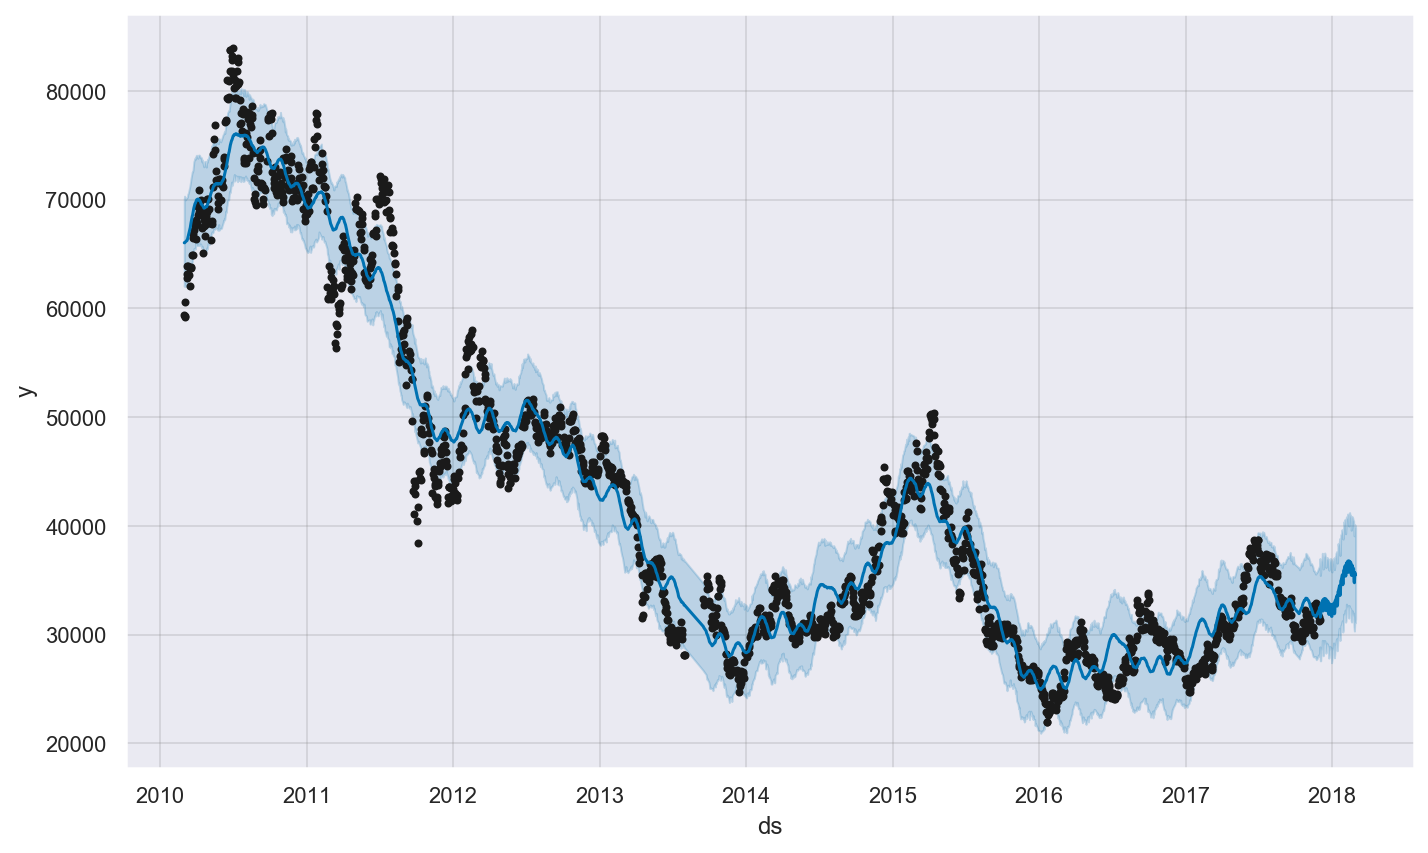

In [125]:
m.plot(forecast);

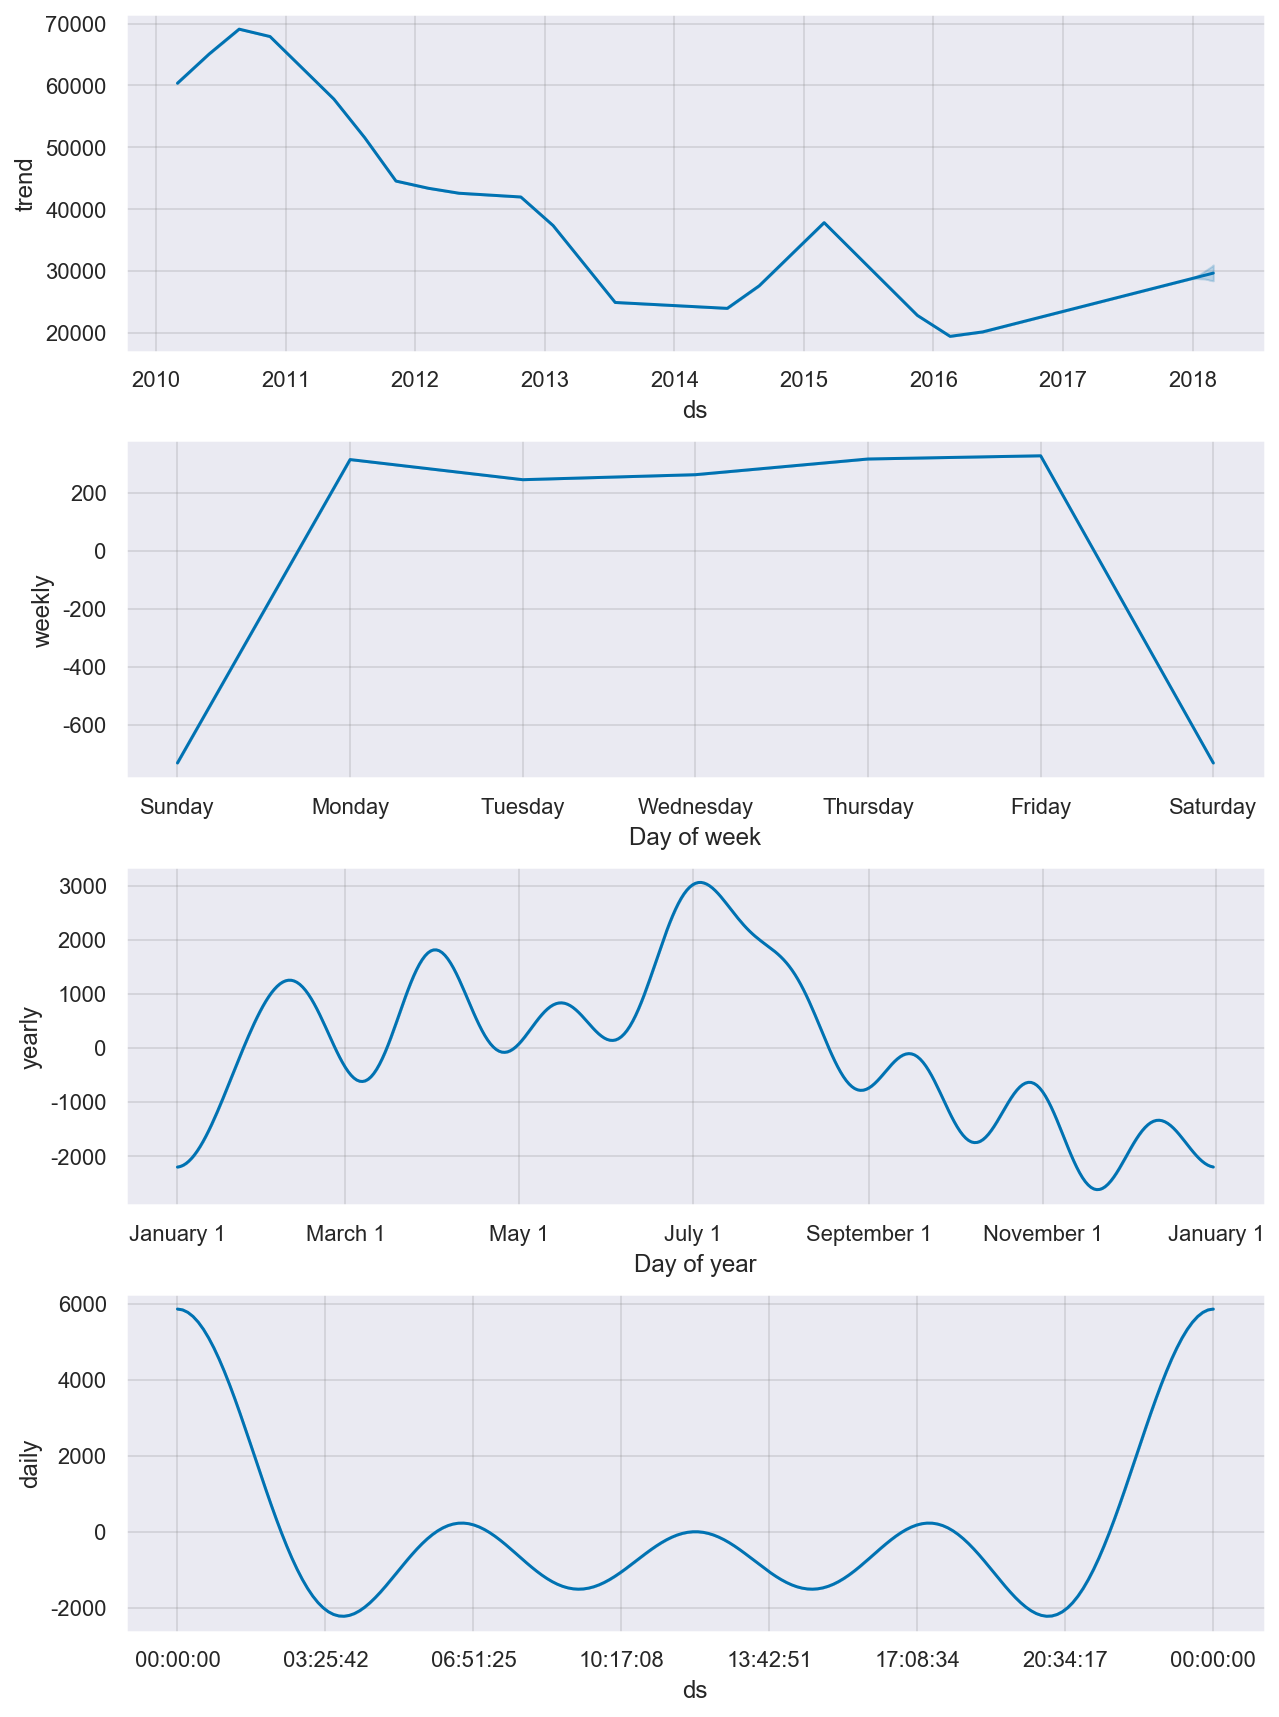

In [126]:
m.plot_components(forecast);

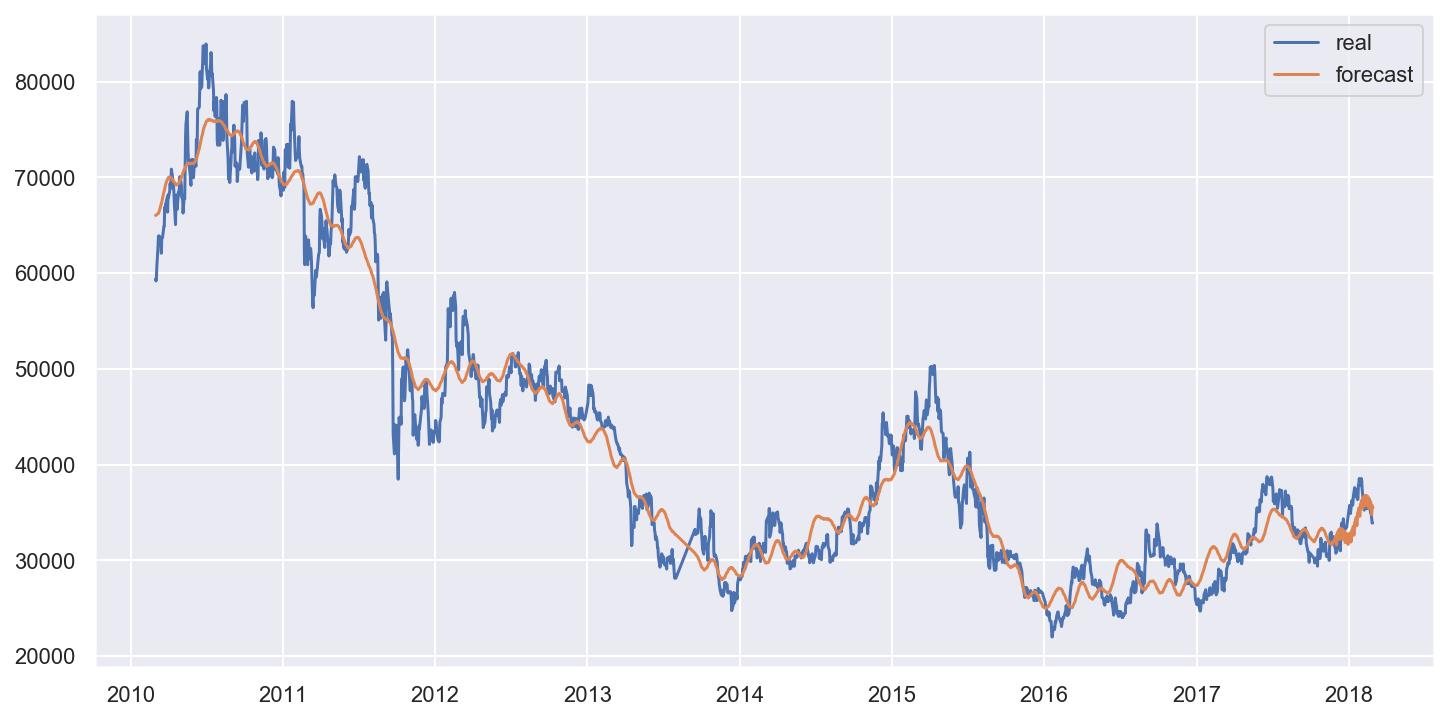

In [127]:
# 실제와 예측값 비교 그래프 
plt.figure(figsize=(12, 6))
plt.plot(KoreaAir.index, KoreaAir["Close"], label="real")
plt.plot(forecast["ds"], forecast["yhat"], label="forecast")
plt.grid(True)
plt.legend()
plt.show()

#### 4. 조금 특이한 형태의 데이터에 대한 forecast 

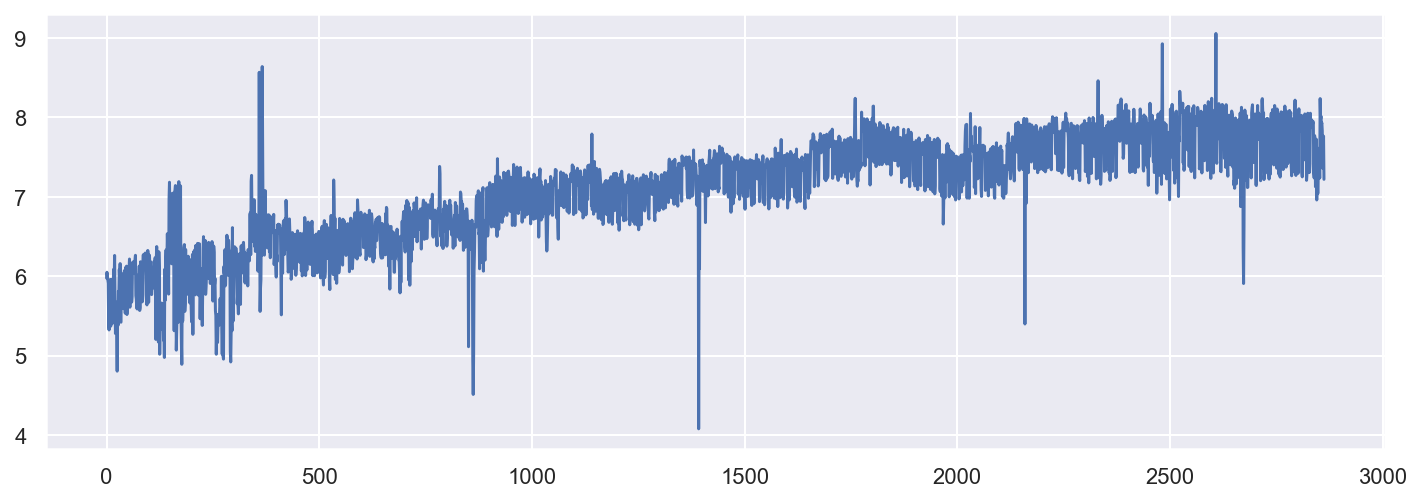

In [129]:
# Logistic 성장형 그래프를 가진 데이터에 대한 forecast 
df = pd.read_csv("../data/05_example_wp_R2.csv", index_col=0)
df["y"].plot(figsize=(12, 4), grid=True);

In [130]:
df["cap"] = 8.5
df.tail()

ds         y  cap
2858  2015-12-11  7.834788  8.5
2859  2015-12-12  7.360104  8.5
2860  2015-12-13  7.479864  8.5
2861  2015-12-18  7.765145  8.5
2862  2015-12-19  7.220374  8.5

In [131]:
m = Prophet(growth="logistic", daily_seasonality=True)
m.fit(df);

Initial log joint probability = -19.9808
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       9007.71     0.0022764       152.353           1           1      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     151       9011.34   1.88759e-05       149.727   1.605e-07       0.001      235  LS failed, Hessian reset 
     169       9012.57   1.47528e-05       97.3921   6.879e-08       0.001      306  LS failed, Hessian reset 
     199       9013.16   0.000153509       108.576      0.3078           1      341   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        9014.6   0.000634491       312.169      0.3618           1      468   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     327       9015.02   4.57514e-05       237.799   3.266e-07       0.001      560  LS failed, Hessian rese

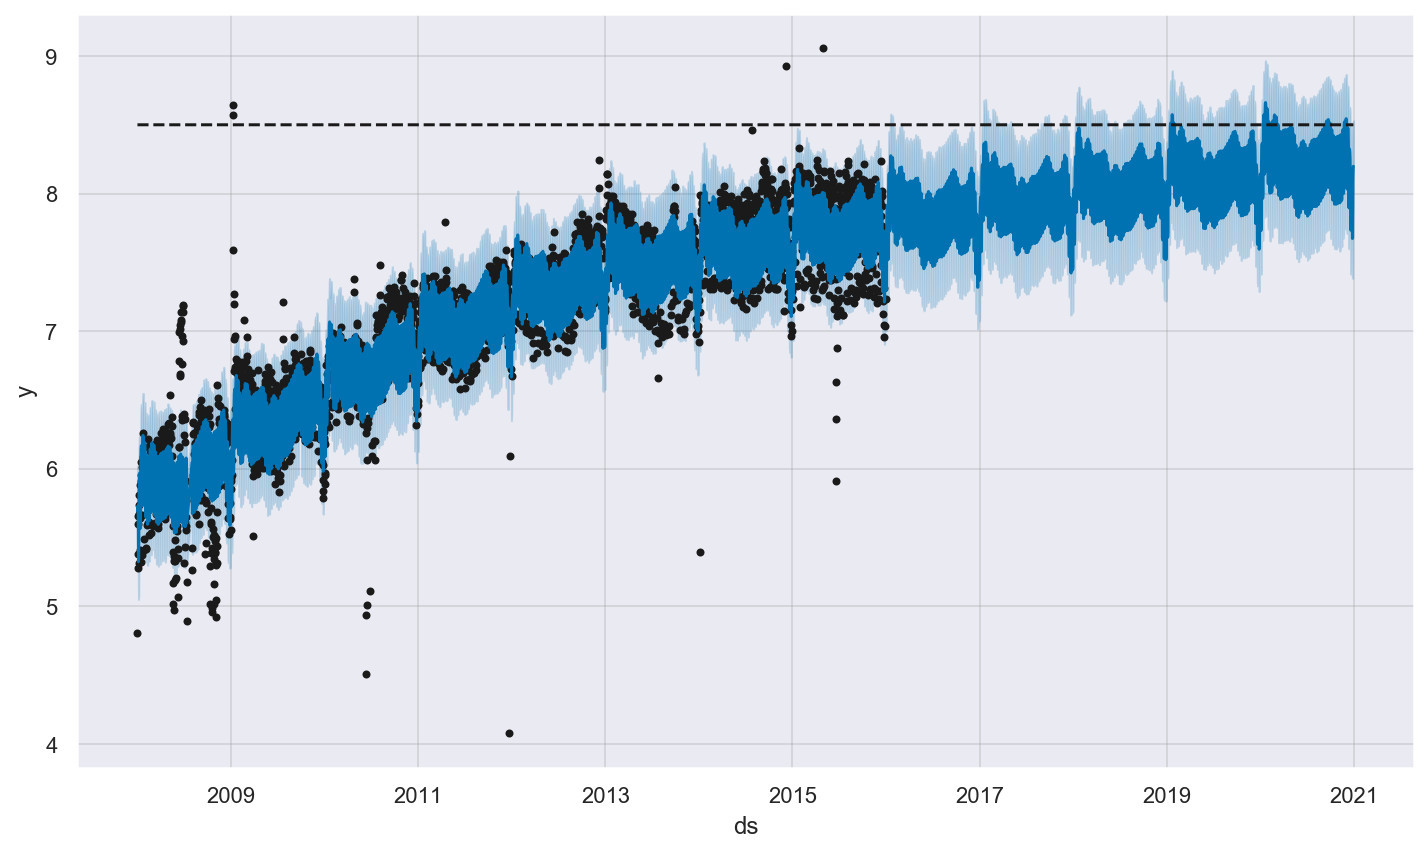

In [132]:
future = m.make_future_dataframe(periods=1826)
future["cap"] = 8.5 
forecast = m.predict(future)
m.plot(forecast);

## 5. 비트코인 데이터 fbprophet으로 분석하기
- https://bitcoincharts.com/charts/bitstampUSD#rg60ztgSzm1g10zm2g25zv

In [133]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import time 

from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains
from bs4 import BeautifulSoup
from fbprophet import Prophet

%matplotlib inline 

In [150]:
url = "https://bitcoincharts.com/charts/bitstampUSD#rg730ztgSzm1g10zm2g25zv"
driver = webdriver.Chrome("../driver/chromedriver")
driver.get(url)

In [151]:
# 스크롤 : return arguments[0].scrollIntoView() 해당 Xpath가 나타날때까지 화면 스크롤
xpath = '//*[@id="content_chart"]/div/div[2]/a'
variable = driver.find_element_by_xpath(xpath)
driver.execute_script("return arguments[0].scrollIntoView();", variable)
variable.click()

In [152]:
html = driver.page_source
soup = BeautifulSoup(html, "html.parser")
table = soup.find("table", "data")
table

<table class="data" id="chart_table" style="display: table;">
<thead>
<tr>
<th>Timestamp</th><th>Open</th><th>High</th><th>Low</th><th>Close</th><th>Volume (BTC)</th><th>Volume (Currency)</th><th>Weighted Price</th>
</tr>
</thead>
<tbody>
<tr><td>2019-10-01 00:00:00</td><td>8304.47</td><td>8531.25</td><td>8195.42</td><td>8319.01</td><td>10224.59</td><td>85718023.2</td><td>8383.52</td></tr><tr><td>2019-10-02 00:00:00</td><td>8326.41</td><td>8393.39</td><td>8170.91</td><td>8373.42</td><td>4952.53</td><td>40874459.88</td><td>8253.24</td></tr><tr><td>2019-10-03 00:00:00</td><td>8377.68</td><td>8419.23</td><td>8029.14</td><td>8239.92</td><td>8701.12</td><td>71397271.09</td><td>8205.53</td></tr><tr><td>2019-10-04 00:00:00</td><td>8243.39</td><td>8244.93</td><td>7986.65</td><td>8152.07</td><td>6278.78</td><td>51161374.46</td><td>8148.3</td></tr><tr><td>2019-10-05 00:00:00</td><td>8157.89</td><td>8195</td><td>8016.26</td><td>8145.17</td><td>4445.1</td><td>36017535.45</td><td>8102.74</td></tr><

In [153]:
driver.quit()

In [154]:
df = pd.read_html(str(table))
bitcoin = df[0]
bitcoin.head()

Timestamp     Open     High      Low    Close  Volume (BTC)  \
0  2019-10-01 00:00:00  8304.47  8531.25  8195.42  8319.01      10224.59   
1  2019-10-02 00:00:00  8326.41  8393.39  8170.91  8373.42       4952.53   
2  2019-10-03 00:00:00  8377.68  8419.23  8029.14  8239.92       8701.12   
3  2019-10-04 00:00:00  8243.39  8244.93  7986.65  8152.07       6278.78   
4  2019-10-05 00:00:00  8157.89  8195.00  8016.26  8145.17       4445.10   

   Volume (Currency)  Weighted Price  
0        85718023.20         8383.52  
1        40874459.88         8253.24  
2        71397271.09         8205.53  
3        51161374.46         8148.30  
4        36017535.45         8102.74

In [155]:
!rm -rf "../data/05_bitcoin_history.csv"
bitcoin.to_csv("../data/05_bitcoin_history.csv", sep=",")

In [156]:
bitcoin = pd.read_csv("../data/05_bitcoin_history.csv", index_col=0)
bitcoin.tail()

Timestamp      Open      High      Low     Close  Volume (BTC)  \
725  2021-09-25 00:00:00  42835.88  43010.69  41689.6  42722.19        879.20   
726  2021-09-26 00:00:00  42699.10  43956.38  40808.0  43204.73       1659.78   
727  2021-09-27 00:00:00  43162.82  44377.70  42130.0  42189.81       1936.65   
728  2021-09-28 00:00:00  42154.87  42778.93  40888.0  41049.00       2246.85   
729  2021-09-29 00:00:00  41024.21  42515.20  40750.0  42307.91        653.19   

     Volume (Currency)  Weighted Price  
725        37363269.71        42497.05  
726        70873269.30        42700.28  
727        83824726.02        43283.37  
728        93999112.34        41835.89  
729        27222841.39        41676.79

In [157]:
# 분석하고 싶은 항목(Close)만 가지고, Prophet 적용 

df = pd.DataFrame({"ds": bitcoin["Timestamp"], "y": bitcoin["Close"]})
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

Initial log joint probability = -13.002
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1640.89    0.00374218       442.215      0.3709      0.3709      137   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        1692.4     0.0156585       1142.87      0.8683     0.08683      260   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1711.67    0.00262457       727.727           1           1      380   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     317       1717.37   0.000454808       518.724    1.15e-06       0.001      440  LS failed, Hessian reset 
     380       1726.79   0.000168467       253.009   8.063e-07       0.001      558  LS failed, Hessian reset 
     399       1728.92    0.00409638       141.074      0.4288           1      581   
    Iter      log prob

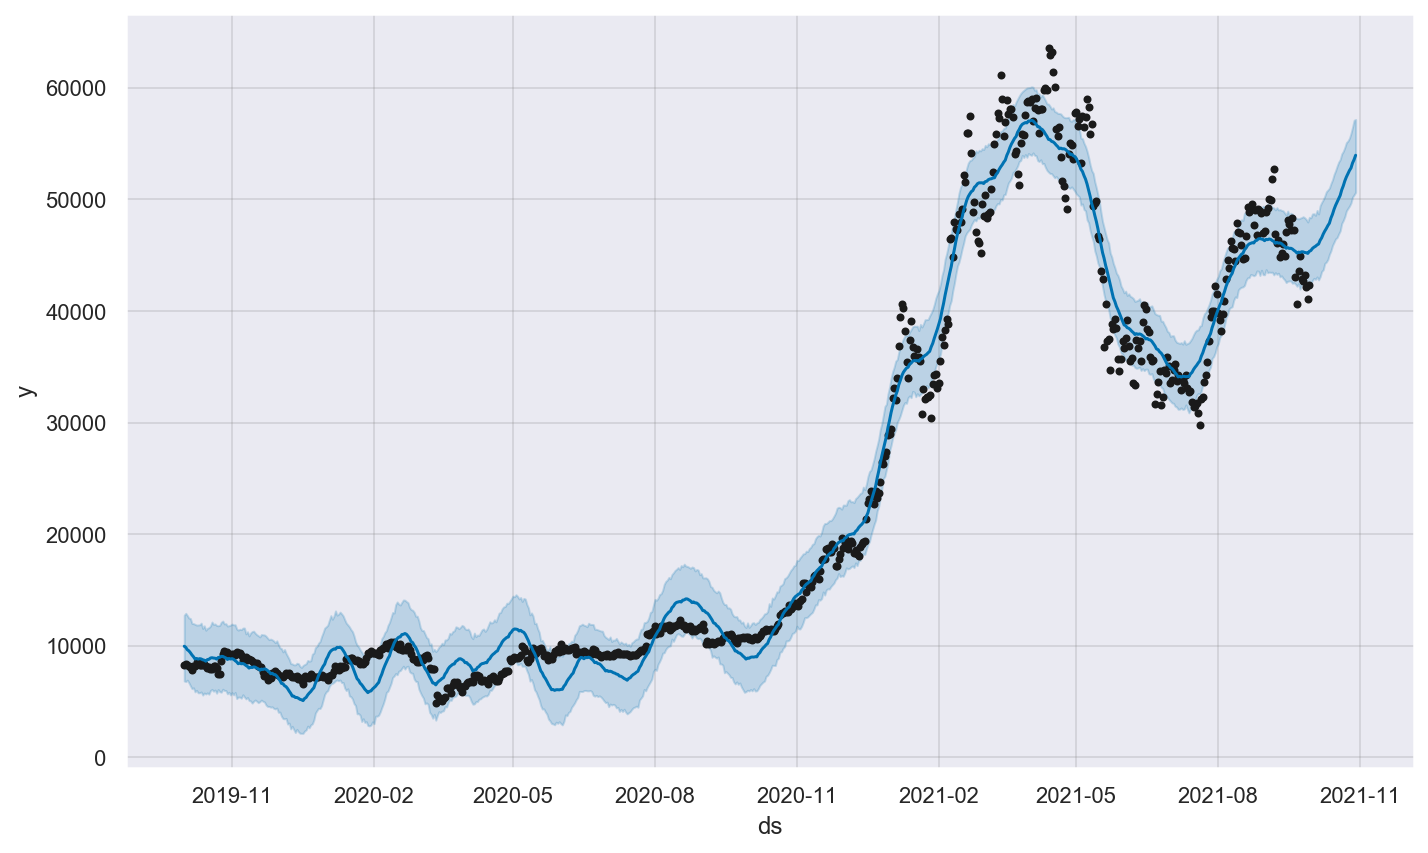

In [158]:
# 향후 30일간의 forecast
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
m.plot(forecast);

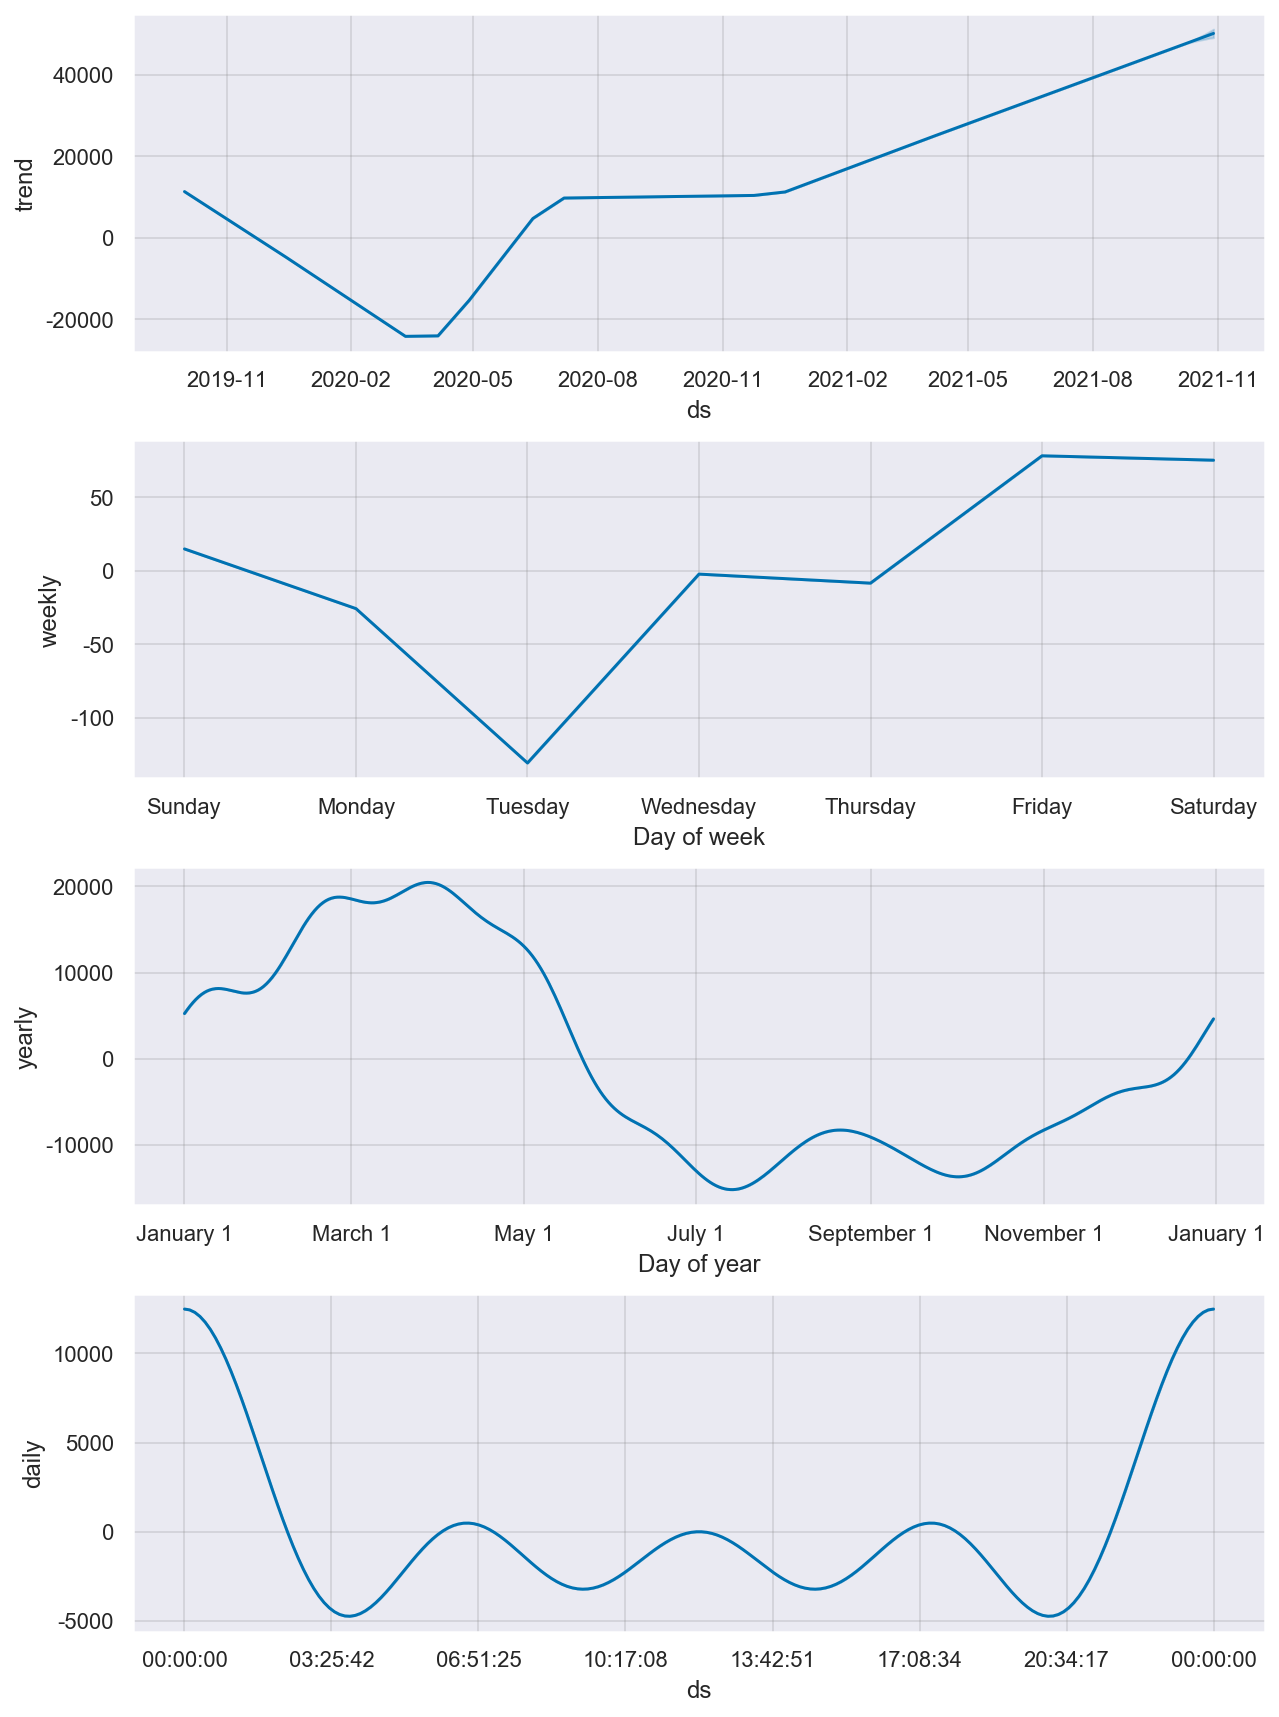

In [159]:
# 트렌드 
m.plot_components(forecast);